In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')


In [321]:
df=pd.read_csv("Education-services-with-station-access_loc.csv", low_memory=False)

pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
pd.set_option("display.max_info_columns", 200) 

In [322]:
df.head() 

ServiceApprovalNumber Provider Approval Number  \
0           SE-00000002              PR-00000898   
1           SE-00000003              PR-40029099   
2           SE-00000004              PR-00000898   
3           SE-00000005              PR-40002184   
4           SE-00000006              PR-40029104   

                                         ServiceName  \
0    Community Kids Waterford Early Education Centre   
1                  KIDVENTURE EARLY LEARNING EAGLEBY   
2                 Community Kids - Broadbeach Waters   
3  Little Scholars School of Early Learning Burle...   
4                      Small World Child Care Centre   

                                   ProviderLegalName        ServiceType  \
0                               G8 Education Limited  Centre-Based Care   
1  Table Mountain Trading Pty Ltd As The Trustee ...  Centre-Based Care   
2                               G8 Education Limited  Centre-Based Care   
3                         The Scholars Group Pty Ltd  Centre-Based Care   
4  A. & K. Massouras Pty. Ltd. ATF The A Massoura...  Centre-Based Care   

       ServiceAddress             Suburb State  Postcode         Phone  \
0      8-10 Allora St     WATERFORD WEST   QLD    4133.0    0732009852   
1       82 Fryar Road            EAGLEBY   QLD    4207.0    0738073222   
2     4 Fremar Street  BROADBEACH WATERS   QLD    4217.0    0755920306   
3   143 Christine Ave    BURLEIGH WATERS   QLD    4220.0    0755353288   
4  113-115 Pappas Way            CARRARA   QLD    4211.0  07 5594 1844   

         Fax                             Conditions on Approval  \
0        NaN  This service is approved to provide education ...   
1        NaN  This service is not required to comply with P3...   
2        NaN  This service is approved to exceed the approve...   
3        NaN  This service is approved to provide education ...   
4  5594 1844  This service is approved to provide education ...   

   NumberOfApprovedPlaces ServiceApprovalGrantedDate QualityArea1Rating  \
0                    60.0                 03/11/2010        Meeting NQS   
1                    74.0                 13/09/2010        Meeting NQS   
2                    75.0                 13/09/2010        Meeting NQS   
3                   106.0                 11/07/2011        Meeting NQS   
4                    92.0                 08/08/2010        Meeting NQS   

  QualityArea2Rating QualityArea3Rating QualityArea4Rating  \
0        Meeting NQS        Meeting NQS        Meeting NQS   
1        Meeting NQS        Meeting NQS        Meeting NQS   
2        Meeting NQS        Meeting NQS        Meeting NQS   
3        Meeting NQS        Meeting NQS        Meeting NQS   
4        Meeting NQS        Meeting NQS        Meeting NQS   

    QualityArea5Rating QualityArea6Rating QualityArea7Rating  \
0          Meeting NQS        Meeting NQS        Meeting NQS   
1  Working Towards NQS        Meeting NQS        Meeting NQS   
2          Meeting NQS        Meeting NQS        Meeting NQS   
3          Meeting NQS        Meeting NQS        Meeting NQS   
4          Meeting NQS        Meeting NQS        Meeting NQS   

         OverallRating RatingsIssued PreviousQualityArea1Rating  \
0          Meeting NQS      Sep 2023              Exceeding NQS   
1  Working Towards NQS      Apr 2023                Meeting NQS   
2          Meeting NQS      Dec 2022                Meeting NQS   
3          Meeting NQS      Oct 2019                Meeting NQS   
4          Meeting NQS      Jul 2023                Meeting NQS   

  PreviousQualityArea2Rating PreviousQualityArea3Rating  \
0                Meeting NQS              Exceeding NQS   
1                Meeting NQS                Meeting NQS   
2              Exceeding NQS              Exceeding NQS   
3              Exceeding NQS                Meeting NQS   
4                Meeting NQS                Meeting NQS   

  PreviousQualityArea4Rating PreviousQualityArea5Rating  \
0                Meeting NQ

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17663 entries, 0 to 17662
Data columns (total 103 columns):
 #    Column                                            Non-Null Count  Dtype  
---   ------                                            --------------  -----  
 0    ServiceApprovalNumber                             17663 non-null  object 
 1    Provider Approval Number                          17663 non-null  object 
 2    ServiceName                                       17663 non-null  object 
 3    ProviderLegalName                                 17556 non-null  object 
 4    ServiceType                                       17663 non-null  object 
 5    ServiceAddress                                    17653 non-null  object 
 6    Suburb                                            17653 non-null  object 
 7    State                                             17653 non-null  object 
 8    Postcode                                          17653 non-null  float64
 9    Phon

In [324]:
df.describe(include='all') 

ServiceApprovalNumber Provider Approval Number  \
count                  17663                    17663   
unique                 17663                     7186   
top              SE-00000002              PR-00001129   
freq                       1                      628   
mean                     NaN                      NaN   
std                      NaN                      NaN   
min                      NaN                      NaN   
25%                      NaN                      NaN   
50%                      NaN                      NaN   
75%                      NaN                      NaN   
max                      NaN                      NaN   

                          ServiceName             ProviderLegalName  \
count                           17663                         17556   
unique                          17441                          7096   
top     Active Kids After School Care  Goodstart Early Learning Ltd   
freq                                6                           628   
mean                              NaN                           NaN   
std                               NaN                           NaN   
min                               NaN                           NaN   
25%                               NaN                           NaN   
50%                               NaN                           NaN   
75%                               NaN                           NaN   
max                               NaN                           NaN   

              ServiceType   ServiceAddress     Suburb  State      Postcode  \
count               17663            17653      17653  17653  17653.000000   
unique                  2            17210       4043      8           NaN   
top     Centre-Based Care  Lawrence Street  TOOWOOMBA    NSW           NaN   
freq                17246                4         58   5950           NaN   
mean                  NaN              NaN        NaN    NaN   3557.282332   
std                   NaN              NaN        NaN    NaN   1318.632409   
min                   NaN              NaN        NaN    NaN    800.000000   
25%                   NaN              NaN        NaN    NaN   2483.000000   
50%                   NaN              NaN        NaN    NaN   3172.000000   
75%                   NaN              NaN        NaN    NaN   4350.000000   
max                   NaN              NaN        NaN    NaN   7467.000000   

             Phone         Fax  \
count        16918        5237   
unique       15195        4826   
top     1300035000  0000000000   
freq           224          44   
mean           NaN         NaN   
std            NaN         NaN   
min            NaN         NaN   
25%            NaN         NaN   
50%            NaN         NaN   
75%            NaN         NaN   
max            NaN         NaN   

                                   Conditions on Approval  \
count                                                6247   
unique                                               3246   
top     •\t    An approved provider of an education an...   
freq                                                  342   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

        NumberOfApprovedPlaces ServiceApprovalGrantedDate QualityArea1Rating  \
count             17246.000000                      17662              16336   
unique                     NaN                       4301                  4   
top                        NaN                 01/01/2012        Meeting NQS   
freq                       NaN                       4190             

In [325]:
df.isnull().sum()

ServiceApprovalNumber                                   0
Provider Approval Number                                0
ServiceName                                             0
ProviderLegalName                                     107
ServiceType                                             0
ServiceAddress                                         10
Suburb                                                 10
State                                                  10
Postcode                                               10
Phone                                                 745
Fax                                                 12426
Conditions on Approval                              11416
NumberOfApprovedPlaces                                417
ServiceApprovalGrantedDate                              1
QualityArea1Rating                                   1327
QualityArea2Rating                                   1327
QualityArea3Rating                                   1327
QualityArea4Ra

In [326]:
df['ServiceType'].value_counts()

ServiceType
Centre-Based Care    17246
Family Day Care        417
Name: count, dtype: int64

In [327]:
df['OverallRating'].value_counts()

OverallRating
Meeting NQS                         11358
Exceeding NQS                        3465
Working Towards NQS                  1473
Excellent                              27
Significant Improvement Required       13
Name: count, dtype: int64

# EDA

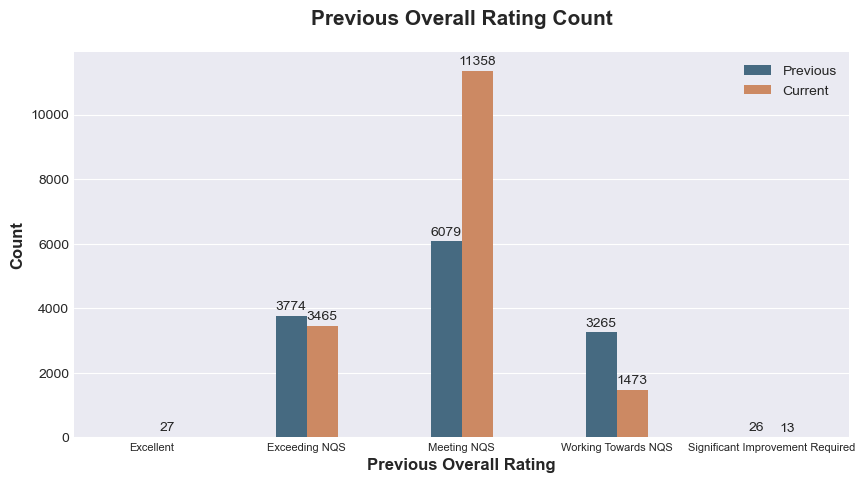

In [328]:
quality_rating = ['Excellent','Exceeding NQS', 'Meeting NQS', 'Working Towards NQS', 'Significant Improvement Required']

plt.figure(figsize=(10,5))

df_melted = df.melt(
    value_vars=['PreviousOverallRating', 'OverallRating' ],
    var_name='OverallRating',
    value_name='Rating'
)

ax = sns.countplot( data=df_melted, x='Rating', hue='OverallRating', order = quality_rating,  palette=['#3C6C8B','#DD8452'], width=0.4 )

for i in ax.containers:
    ax.bar_label(i, fontsize=10, padding=2)

plt.xlabel('Previous Overall Rating', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title("Previous Overall Rating Count", fontsize=15, fontweight='bold', pad=20)
plt.legend(labels=['Previous', 'Current'])

plt.xticks(fontsize=8)
plt.show()

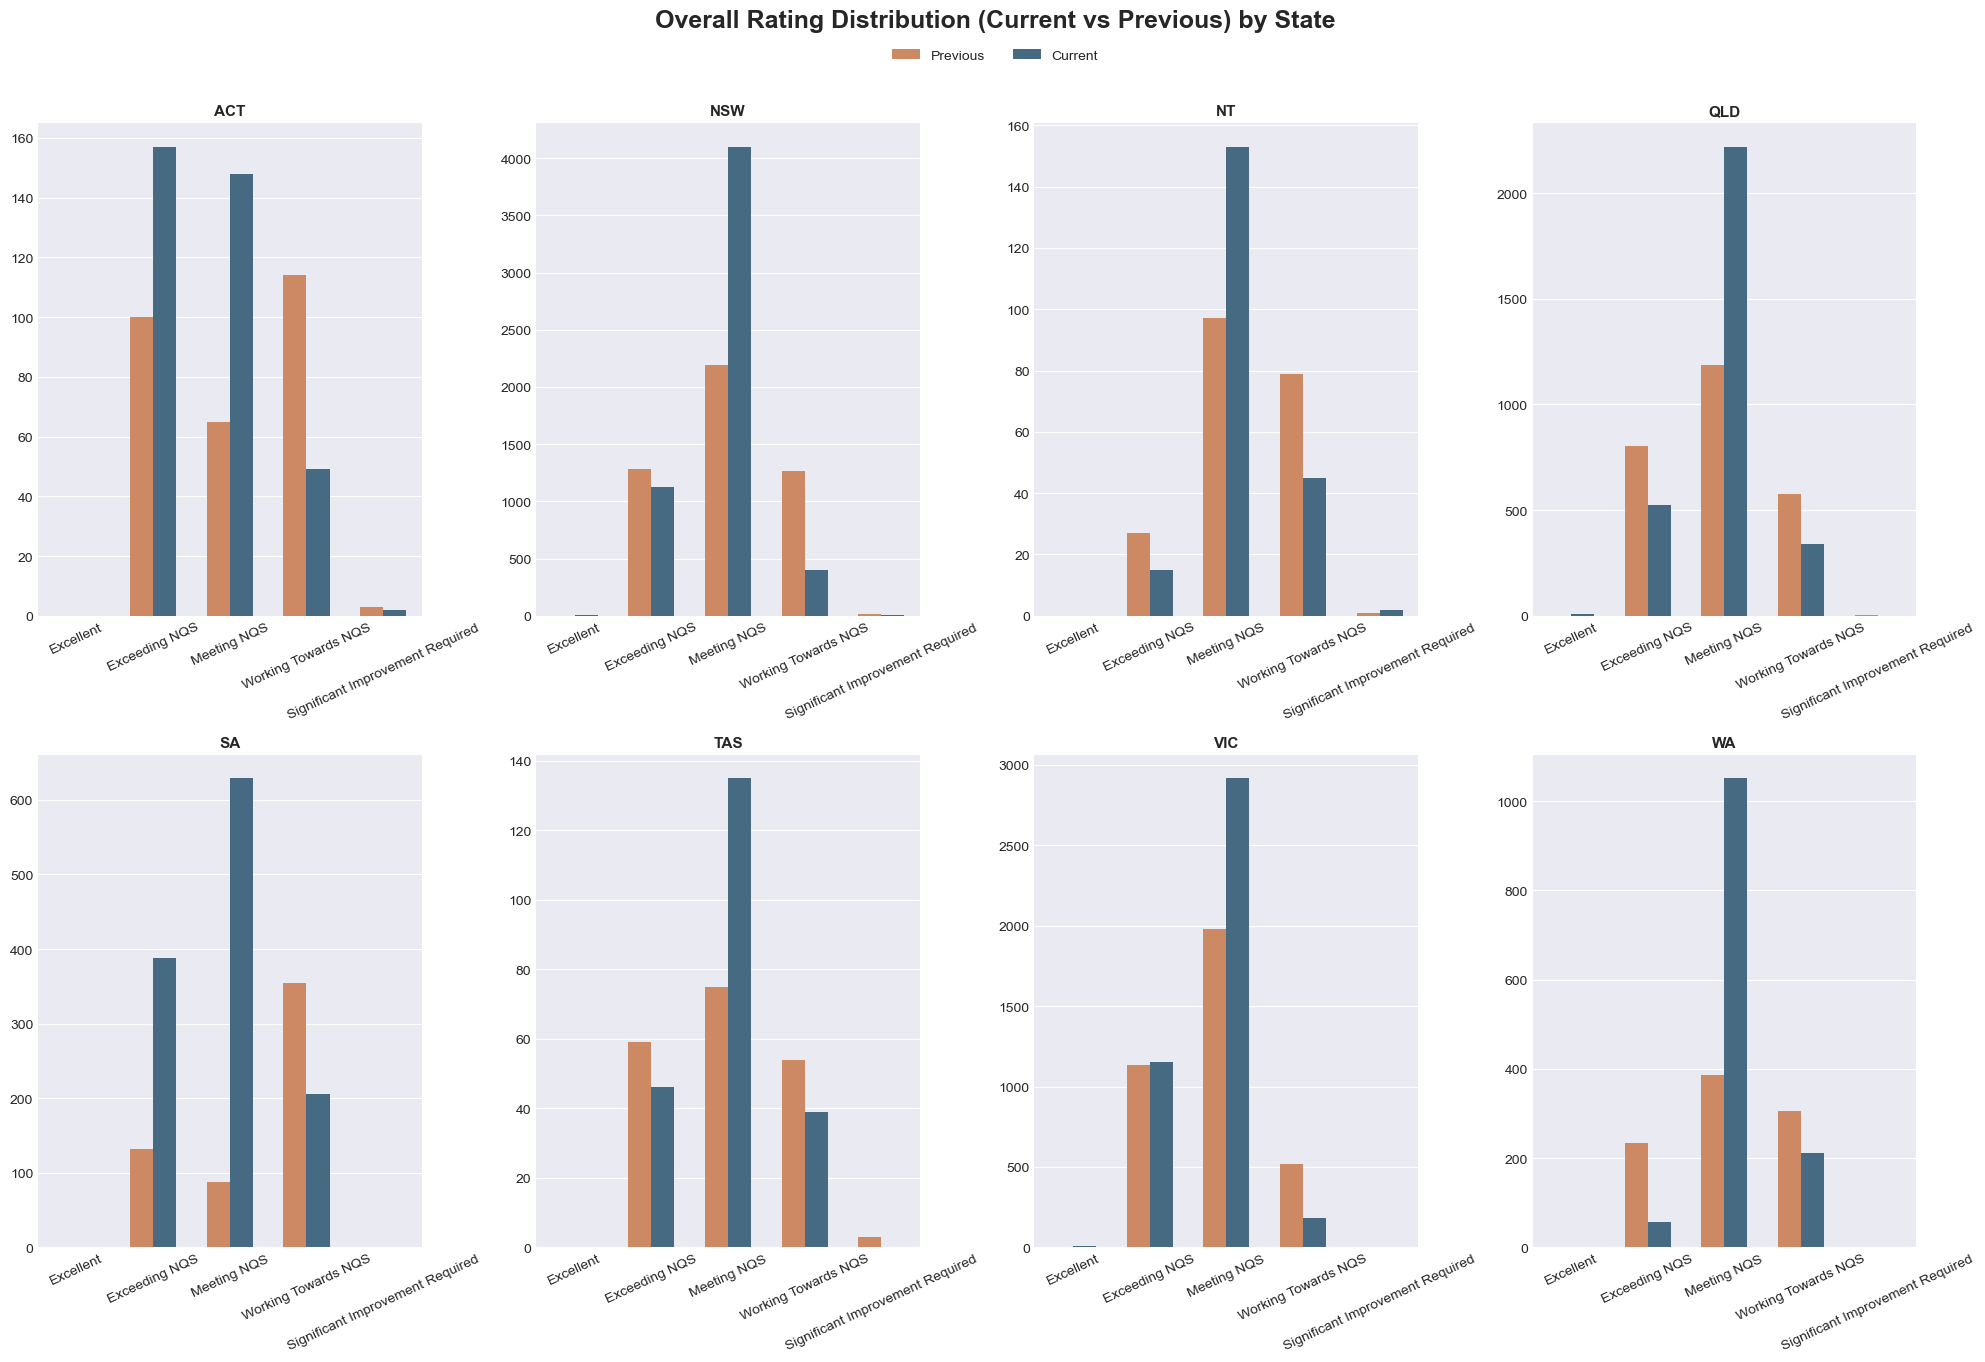

In [329]:
state_list = sorted(df['State'].dropna().astype(str).unique())[:24]

color_current = '#3C6C8B'   
color_previous = '#DD8452'  

rating_order = ['Excellent','Exceeding NQS','Meeting NQS','Working Towards NQS','Significant Improvement Required']

fig, axes = plt.subplots(2, 4, figsize=(20, 14))
axes = axes.flatten()

for i, state in enumerate(state_list):
    ax = axes[i]
    df_state = df[df['State'] == state]

    if df_state.empty:
        ax.axis('off')
        continue

    df_melted = df_state.melt(
        value_vars=['PreviousOverallRating', 'OverallRating'],
        var_name='Period',
        value_name='Rating'
    )

    sns.countplot(data=df_melted, x='Rating', hue='Period', order=rating_order, palette=[color_previous, color_current], width=0.6, ax=ax)

    ax.set_title(f"{state}", fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=25)
    ax.legend([], [], frameon=False)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Overall Rating Distribution (Current vs Previous) by State", fontsize=18, fontweight='bold', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.94])

fig.legend(['Previous', 'Current'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.show()

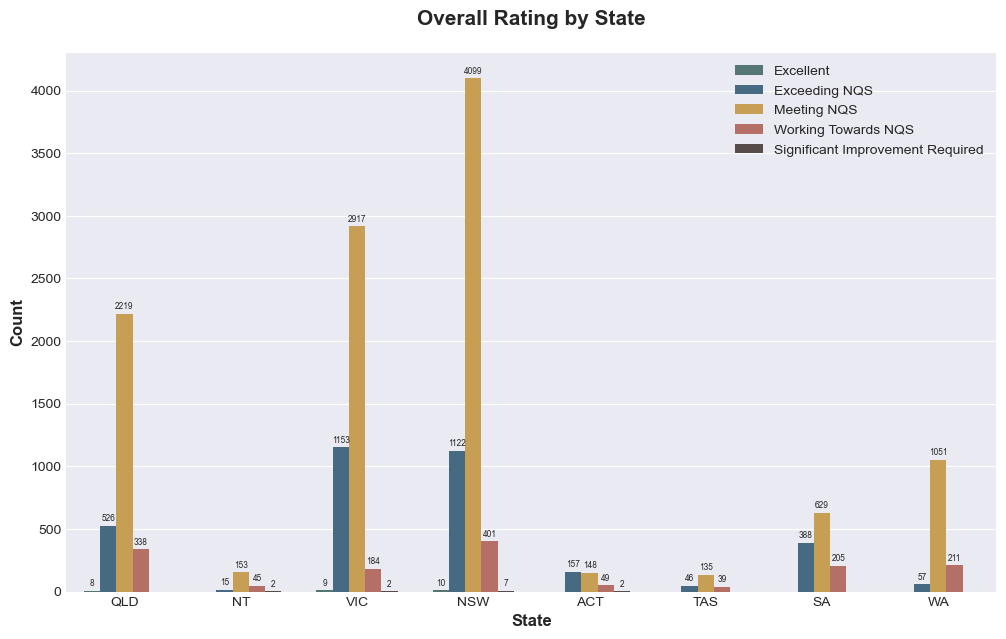

In [330]:
plt.figure(figsize=(12,7))

rating_colors = ['Excellent',
               'Exceeding NQS',
               'Meeting NQS',
               'Working Towards NQS',
               'Significant Improvement Required']

# color_dict = {'Excellent':'#91B5A9',
#               'Exceeding NQS': '#7892B5',
#               'Meeting NQS': '#EDCA7F',
#               'Working Towards NQS': '#D98481',
#               'Significant Improvement Required':'#776C6B'}

color_dict = {'Excellent':'#4F7C77',
                      'Exceeding NQS':'#3C6C8B',
                      'Meeting NQS':'#D9A441',
                      'Working Towards NQS':'#C1665A',
                      'Significant Improvement Required':'#5A4A49'}
color_dict_previous = {k: sns.desaturate(v, 0.4) for k, v in color_dict_current.items()}


state_order = (df['State'].value_counts().index)
    
ax = sns.countplot(data=df, x='State', hue='OverallRating', hue_order = color_order, palette=color_dict, width=0.7)

for i in ax.containers:
    ax.bar_label(i, fontsize=6, padding=2)

plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title("Overall Rating by State", fontsize=15, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=10, framealpha=0.9) 


plt.show()


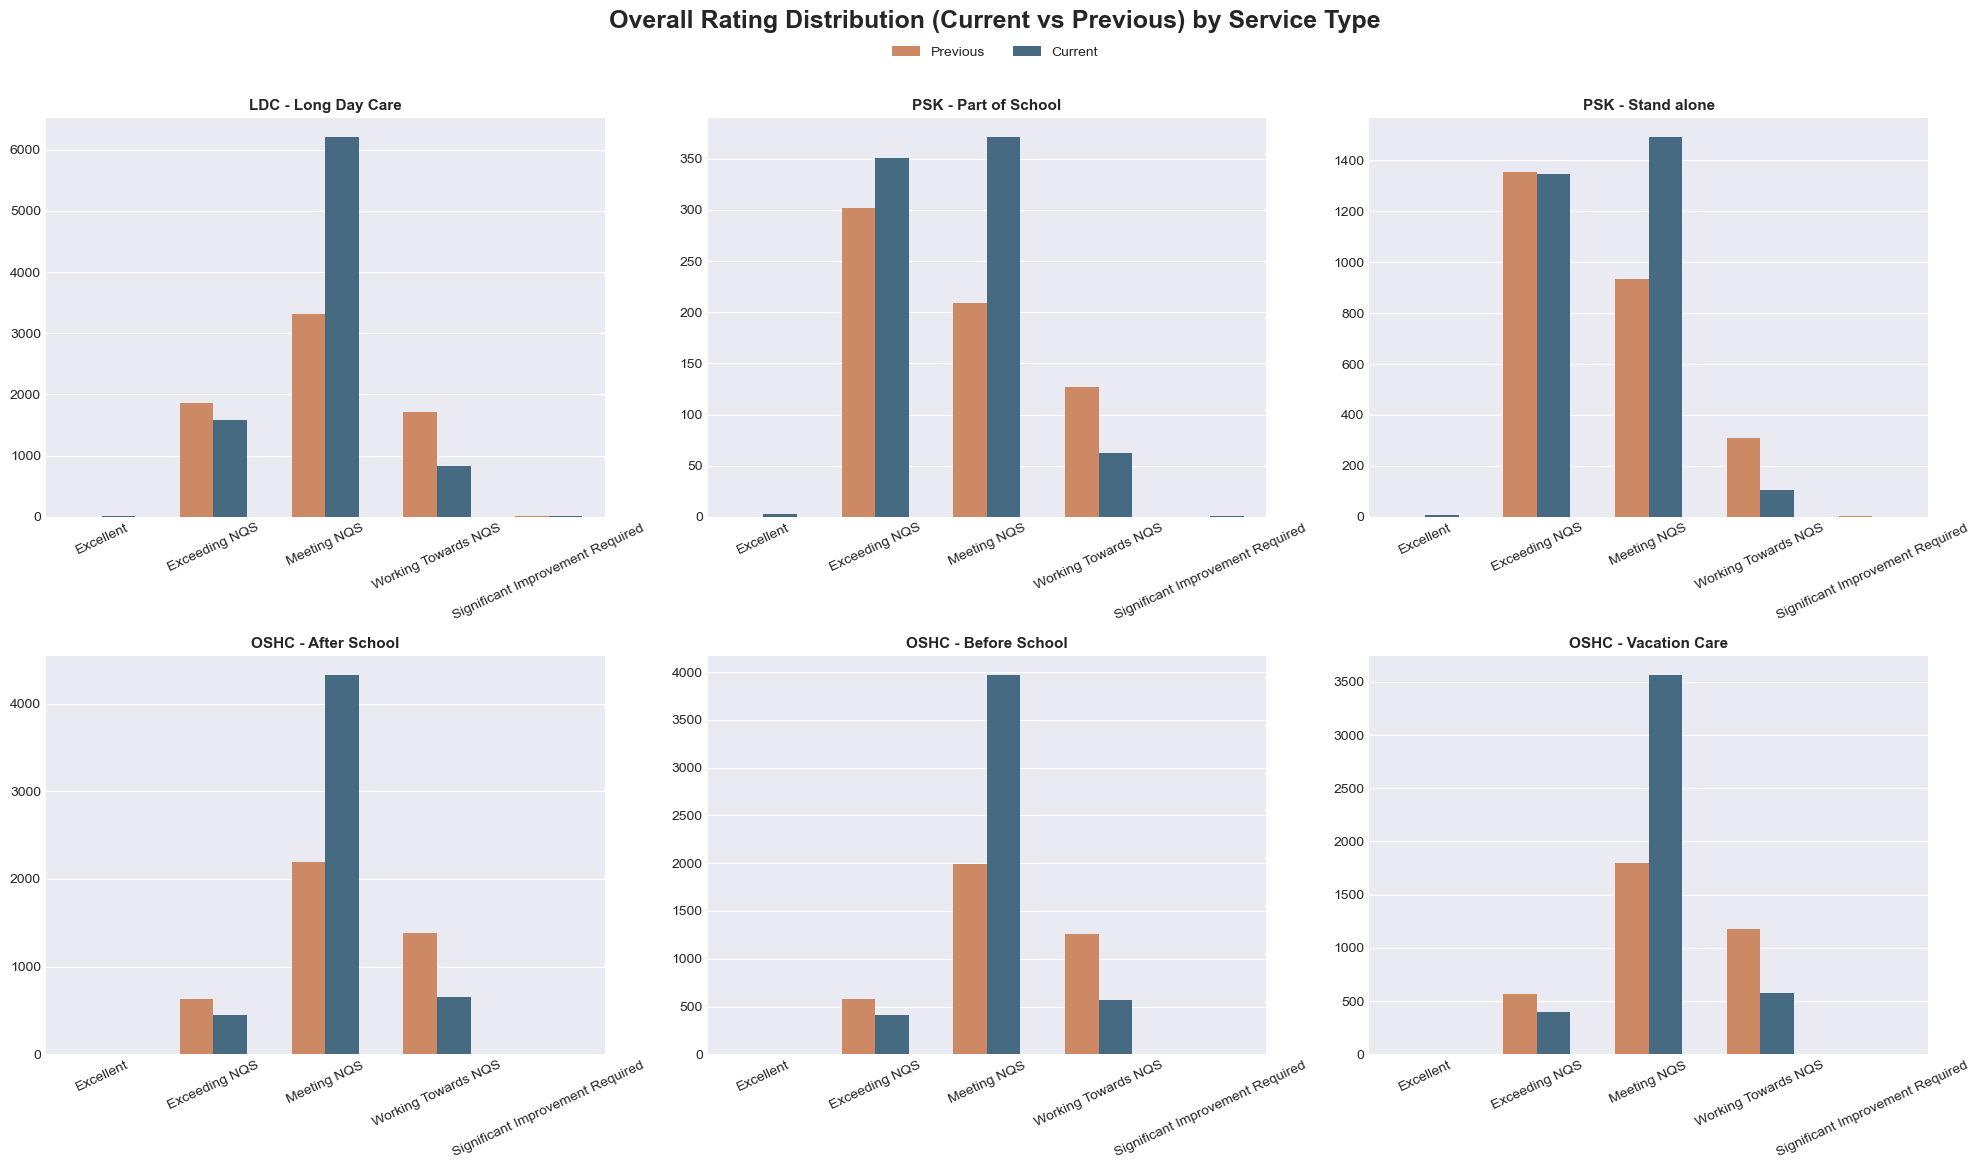

In [331]:
color_current = '#3C6C8B'
color_previous = '#DD8452'
rating_order = ['Excellent','Exceeding NQS','Meeting NQS','Working Towards NQS','Significant Improvement Required']

service_type = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care']

service_names_short = [
    'LDC - Long Day Care',
    'PSK - Part of School',
    'PSK - Stand alone',
    'OSHC - After School',
    'OSHC - Before School',
    'OSHC - Vacation Care']
name_map = dict(zip(service_cols, service_names_short))

df_long = df.melt(
    id_vars=['OverallRating', 'PreviousOverallRating'],
    value_vars=service_type,
    var_name='ServiceType',
    value_name='HasService'
)
df_long = df_long[df_long['HasService'] == 'Yes']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, svc in enumerate(service_cols):
    ax = axes[i]
    df_svc = df_long[df_long['ServiceType'] == svc]

    if df_svc.empty:
        ax.axis('off')
        continue

    df_melted = df_svc.melt(
        value_vars=['PreviousOverallRating', 'OverallRating'],
        var_name='Period',
        value_name='Rating')

    sns.countplot(data=df_melted, x='Rating', hue='Period', order=rating_order, palette=[color_previous, color_current], width=0.6, ax=ax)

    ax.set_title(name_map.get(svc, svc), fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=25)
    ax.legend([], [], frameon=False)


fig.suptitle("Overall Rating Distribution (Current vs Previous) by Service Type",
             fontsize=18, fontweight='bold', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.94])

fig.legend(['Previous', 'Current'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.show()

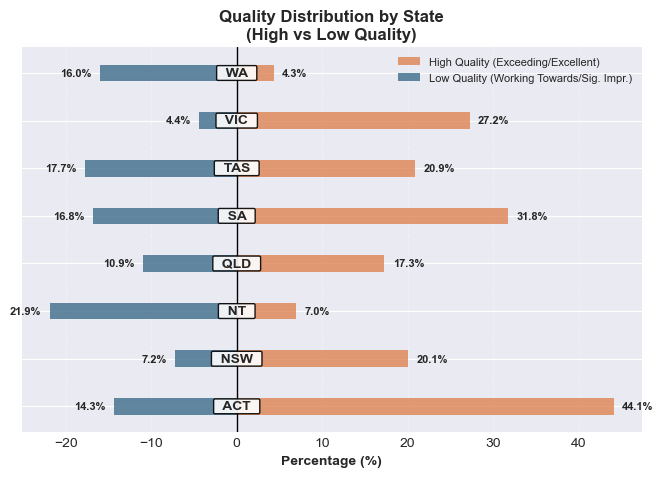

In [332]:
states = sorted(df['State'].dropna().unique())

fig, ax = plt.subplots(figsize=(8, 5))

high_quality_pct = []
low_quality_pct = []

for state in states:
    state_data = df[df['State'] == state]
    total = len(state_data[state_data['OverallRating'].notna()])
    
    if total > 0:
        high = len(state_data[state_data['OverallRating'].isin(['Exceeding NQS', 'Excellent'])])
        low = len(state_data[state_data['OverallRating'].isin(
            ['Working Towards NQS', 'Significant Improvement Required'])])
        
        high_quality_pct.append((high / total) * 100)
        low_quality_pct.append((low / total) * 100)
    else:
        high_quality_pct.append(0)
        low_quality_pct.append(0)

x = np.arange(len(states))
width = 0.35

bars1 = ax.barh(x, high_quality_pct, width, 
                 label='High Quality (Exceeding/Excellent)',
                 color='#DD8452', alpha=0.8)
bars2 = ax.barh(x, [-p for p in low_quality_pct], width,
                 label='Low Quality (Working Towards/Sig. Impr.)',
                 color='#3C6C8B', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels([])
for i, state in enumerate(states):
    ax.text(0, i, f'  {state}  ', ha='center', va='center', 
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.1', facecolor='white', 
                     edgecolor='black', linewidth=1, alpha=0.9))
    
ax.set_xlabel('Percentage (%)', fontweight='bold')
ax.set_title('Quality Distribution by State\n(High vs Low Quality)',
              fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linewidth=1)
ax.legend(loc='upper right', fontsize=8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (h, l) in enumerate(zip(high_quality_pct, low_quality_pct)):
    ax.text(h + 1, i, f'{h:.1f}%', va='center', fontsize=8, fontweight='bold')
    ax.text(-l - 1, i, f'{l:.1f}%', va='center', ha='right', 
             fontsize=8, fontweight='bold')

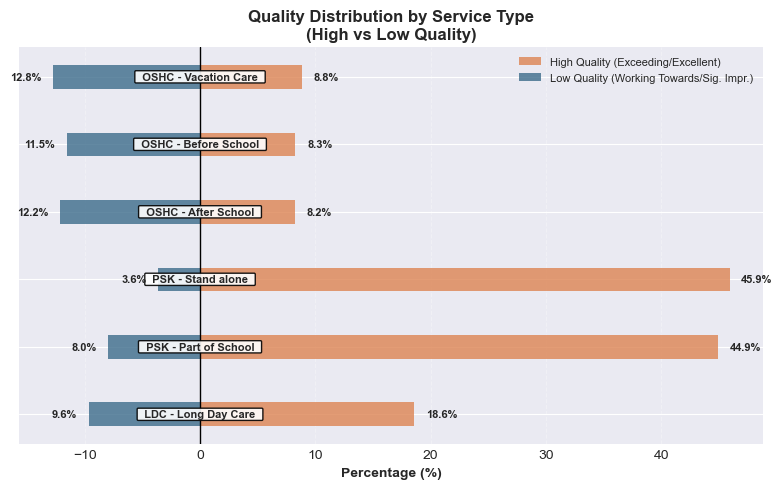

In [333]:
for col in service_type:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.upper()
        df[col] = df[col].replace({'YES': 'Yes', 'NO': 'No', 'TRUE': 'Yes', 'FALSE': 'No', '1': 'Yes', '0': 'No'})
        df[col] = df[col].fillna('No')

fig, ax = plt.subplots(figsize=(8, 5))
high_quality_pct = []
low_quality_pct = []

for service_col, service_name in zip(service_type, service_names_short):
    service_data = df[df[service_col] == 'Yes']
    total = len(service_data[service_data['OverallRating'].notna()])
    
    if total > 0:
        high = len(service_data[service_data['OverallRating'].isin(['Exceeding NQS', 'Excellent'])])
        low = len(service_data[service_data['OverallRating'].isin(
            ['Working Towards NQS', 'Significant Improvement Required'])])
        
        high_quality_pct.append((high / total) * 100)
        low_quality_pct.append((low / total) * 100)
    else:
        high_quality_pct.append(0)
        low_quality_pct.append(0)

x = np.arange(len(service_names_short))
width = 0.35

bars1 = ax.barh(x, high_quality_pct, width, 
                 label='High Quality (Exceeding/Excellent)',
                 color='#DD8452', alpha=0.8)
bars2 = ax.barh(x, [-p for p in low_quality_pct], width,
                 label='Low Quality (Working Towards/Sig. Impr.)',
                 color='#3C6C8B', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels([])

for i, service_name in enumerate(service_names_short):
    ax.text(0, i, f'  {service_name}  ', ha='center', va='center', 
            fontsize=8, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.1', facecolor='white', 
                     edgecolor='black', linewidth=1, alpha=0.9))
    
ax.set_xlabel('Percentage (%)', fontweight='bold')
ax.set_title('Quality Distribution by Service Type\n(High vs Low Quality)',
              fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linewidth=1)
ax.legend(loc='upper right', fontsize=8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (h, l) in enumerate(zip(high_quality_pct, low_quality_pct)):
    ax.text(h + 1, i, f'{h:.1f}%', va='center', fontsize=8, fontweight='bold')
    ax.text(-l - 1, i, f'{l:.1f}%', va='center', ha='right', 
             fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('service_type_quality_exact_style.png', dpi=300, bbox_inches='tight')
plt.show()

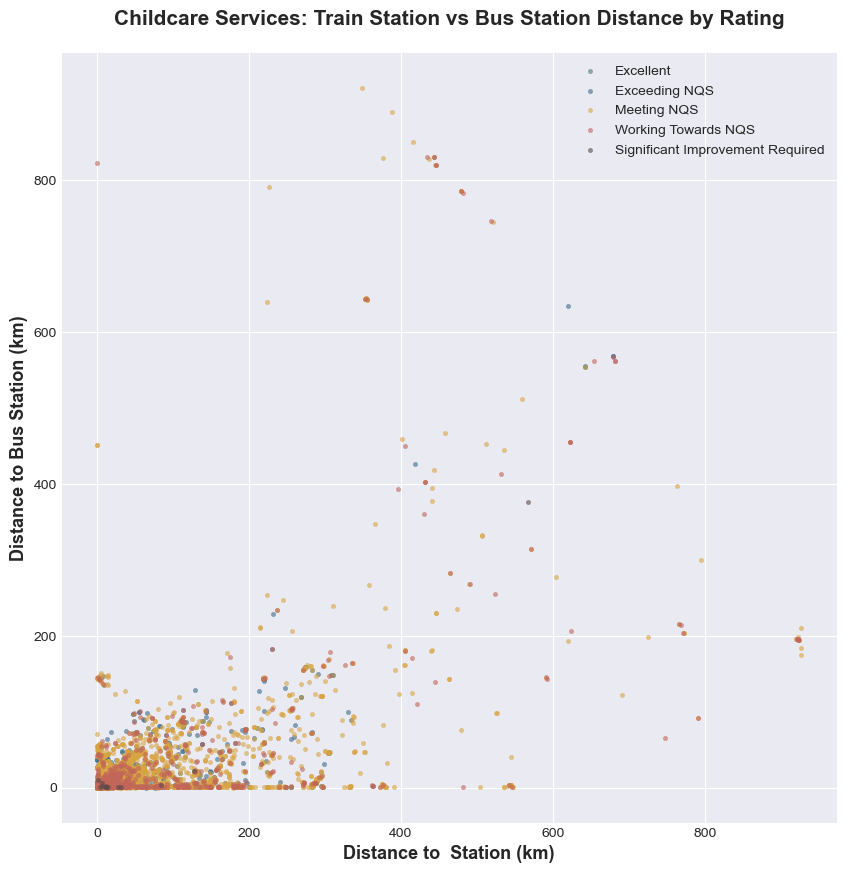

In [334]:
df_valid = df.dropna(subset=['DistanceToBusStation_km', 'DistanceToTrainStation_km', 'OverallRating'])
df_plot = df_valid[df_valid['OverallRating'].isin(color_dict.keys())].copy()

plt.figure(figsize=(10, 10))

for rating, color in color_dict.items():
    data = df_plot[df_plot['OverallRating'] == rating]
    plt.scatter(data['DistanceToBusStation_km'], data['DistanceToTrainStation_km'],c=color, label=rating, s=10, alpha=0.6, linewidth=0.3)

plt.xlabel('Distance to  Station (km)', fontsize=13, fontweight='bold')
plt.ylabel('Distance to Bus Station (km)', fontsize=13, fontweight='bold')
plt.title('Childcare Services: Train Station vs Bus Station Distance by Rating', 
          fontsize=15, fontweight='bold', pad=20)


plt.legend(loc='upper right', fontsize=10, framealpha=0.9)


In [335]:
df['DistanceToTrainStation_km'].describe()

count    17663.000000
mean        11.430682
std         44.637713
min          0.015182
25%          1.097043
50%          2.532500
75%          6.325120
max        922.403322
Name: DistanceToTrainStation_km, dtype: float64

In [336]:
df['DistanceToBusStation_km'].describe()

count    17663.000000
mean        32.089514
std         72.778463
min          0.024614
25%          4.778898
50%         10.195771
75%         23.200038
max        926.875371
Name: DistanceToBusStation_km, dtype: float64

In [337]:
df['MinTransportDistance'] = df[['DistanceToTrainStation_km',
                                 'DistanceToBusStation_km']].min(axis=1)

s = pd.to_numeric(df['MinTransportDistance'], errors='coerce')
s = s.dropna()
s = s[s.between(0, 200)] 

p95 = s.quantile(0.95)
p99 = s.quantile(0.99)
print(f"(95%: {p95:.2f} km, 99%: {p99:.2f} km)")


(95%: 31.94 km, 99%: 98.41 km)


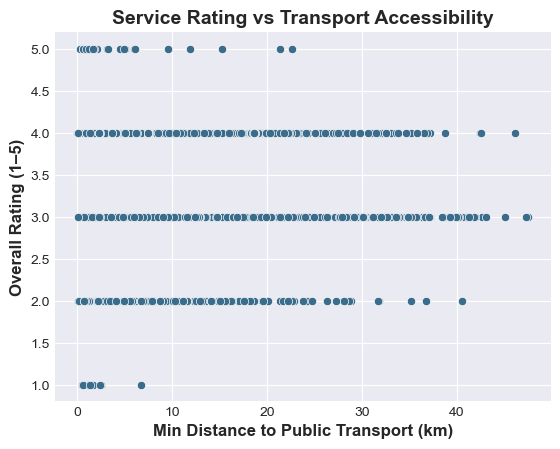

In [338]:
rating_mapping = {
    'Significant Improvement Required': 1,
    'Working Towards NQS': 2,
    'Meeting NQS': 3,
    'Exceeding NQS': 4,
    'Excellent': 5}

df['OverallRating1'] = df['OverallRating'].map(rating_mapping)

df_filtered = df[(df['DistanceToTrainStation_km'] <= 50) & 
    (df['DistanceToBusStation_km'] <= 50)].copy()

df_filtered['MinDistance'] = df_filtered[
    ['DistanceToTrainStation_km', 'DistanceToBusStation_km']].min(axis=1)

sns.scatterplot(x='MinDistance', y='OverallRating1', data=df_filtered, color='#3C6C8B')
plt.xlabel('Min Distance to Public Transport (km)', fontsize=12, fontweight='bold')
plt.ylabel('Overall Rating (1–5)', fontsize=12, fontweight='bold')
plt.title('Service Rating vs Transport Accessibility', fontsize=14, fontweight='bold')

plt.show()

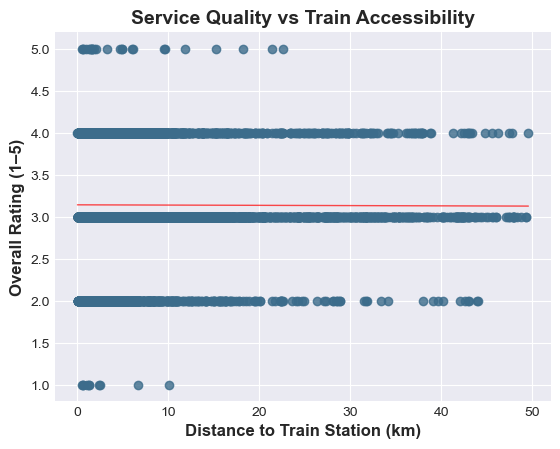

In [339]:
sns.regplot(x='DistanceToTrainStation_km', y='OverallRating1', data=df_filtered, ci = False, color='#3C6C8B', line_kws={"color":"r","alpha":0.7,"lw":1}) 

plt.xlabel("Distance to Train Station (km)", fontsize=12, fontweight='bold')
plt.ylabel("Overall Rating (1–5)", fontsize=12, fontweight='bold')
plt.title("Service Quality vs Train Accessibility", fontsize=14, fontweight='bold')
plt.show()


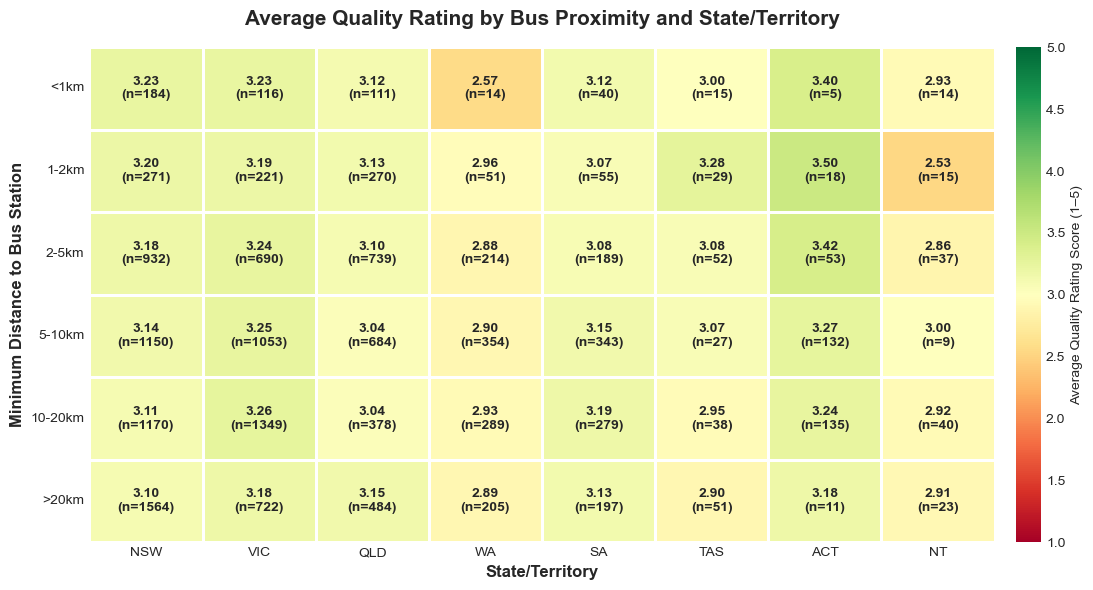

In [532]:
state_candidates = ['State', 'State/Territory', 'State or Territory', 'STATE', 'Jurisdiction']
state_col = next((c for c in state_candidates if c in df.columns), None)
if state_col is None:
    raise ValueError("找不到州字段，请确认数据里是否有 'State' 或类似列名。")

# 2) 公交最短距离分组（与火车分组保持一致，便于比较）
df['BusDistanceGroup'] = pd.cut(
    df['DistanceToBusStation_km'],
    bins=[0, 1, 2, 5, 10, 20, 100],
    labels=['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
)

# 3) 评级映射（若之前已做可跳过）
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
if 'RatingScore' not in df.columns:
    df['RatingScore'] = df['OverallRating'].map(rating_map)

# 4) 透视表：平均评级 & 样本量
pivot_bus_rating = df.pivot_table(
    values='RatingScore',
    index='BusDistanceGroup',
    columns=state_col,
    aggfunc='mean'
)

pivot_bus_count = df.pivot_table(
    values='RatingScore',
    index='BusDistanceGroup',
    columns=state_col,
    aggfunc='count'
)

# 5) 轴顺序：距离从近到远；州按常用顺序（如果缺失则自动跳过）
distance_order = ['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
state_order = ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
existing_states = [s for s in state_order if s in pivot_bus_rating.columns]

pivot_bus_rating = pivot_bus_rating.reindex(index=distance_order, columns=existing_states)
pivot_bus_count  = pivot_bus_count.reindex(index=distance_order, columns=existing_states)

# 6) 自定义注释：显示 平均分 + n
ann = []
for i in range(len(pivot_bus_rating.index)):
    row = []
    for j in range(len(pivot_bus_rating.columns)):
        r = pivot_bus_rating.iloc[i, j]
        n = pivot_bus_count.iloc[i, j]
        if pd.notna(r) and pd.notna(n):
            row.append(f"{r:.2f}\n(n={int(n)})")
        else:
            row.append("")
    ann.append(row)

# 7) 画图
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_bus_rating,
    annot=ann, fmt='',
    cmap='RdYlGn', vmin=1, vmax=5, center=3,
    linewidths=2, linecolor='white',
    cbar_kws={'label': 'Average Quality Rating Score (1–5)', 'pad': 0.02},
    annot_kws={'size': 10, 'weight': 'bold'}
)

plt.title('Average Quality Rating by Bus Proximity and State/Territory',
          fontsize=15, fontweight='bold', pad=16)
plt.xlabel('State/Territory', fontsize=12, fontweight='bold')
plt.ylabel('Minimum Distance to Bus Station', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [445]:
aus = gpd.read_file('/Users/shuuwaka/Desktop/qbus6860/SOS_2021_AUST_GDA94_SHP')
aus = aus.dropna()
aus.geometry = aus.geometry.simplify(0.001)
aus['SOS_CODE21'] = aus['SOS_CODE21'].astype(str)

postcode_df = pd.read_csv('postcode_to_sos.csv')
services_df = pd.read_csv('Education-services-with-station-access_loc.csv')

postcode_df['SOS_Code'] = postcode_df['SOS_Code'].astype(str)
services_df['Postcode_int'] = pd.to_numeric(services_df['Postcode'], errors='coerce').astype('Int64')
postcode_df['Postcode_int'] = pd.to_numeric(postcode_df['Postcode'], errors='coerce').astype('Int64')

result = services_df.merge(postcode_df[['Postcode_int', 'Urban_Rural', 'SOS_Code', 'SOS_Name']], 
                           on='Postcode_int', how='left')
result['DistanceToTrainStation_km'] = pd.to_numeric(result['DistanceToTrainStation_km'], errors='coerce')
result['DistanceToBusStation_km'] = pd.to_numeric(result['DistanceToBusStation_km'], errors='coerce')
result['MinDistance'] = result[['DistanceToTrainStation_km', 'DistanceToBusStation_km']].min(axis=1)

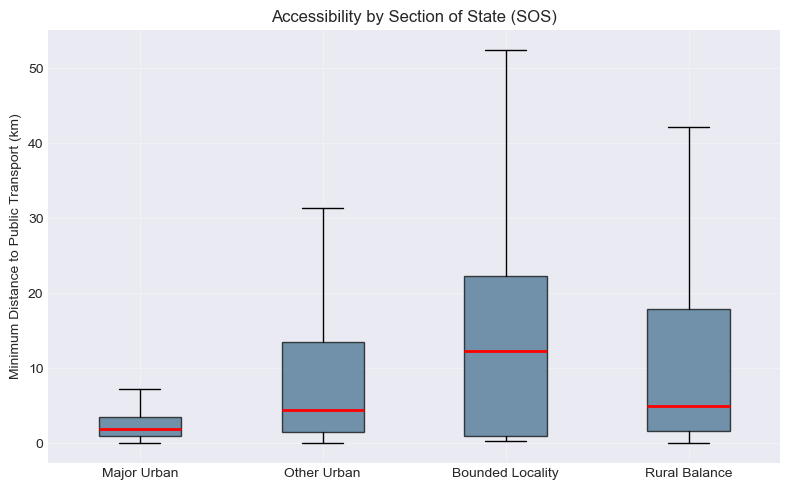

In [446]:
plt.figure(figsize=(8,5))
data_to_plot = [df_plot.loc[df_plot['SOS_Name']==cat, 'MinDistance'].dropna() for cat in sos_order]

plt.boxplot(
    data_to_plot,
    labels=sos_order,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='#3C6C8B', alpha=0.7, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2)
)
plt.ylabel("Minimum Distance to Public Transport (km)")
plt.title("Accessibility by Section of State (SOS)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

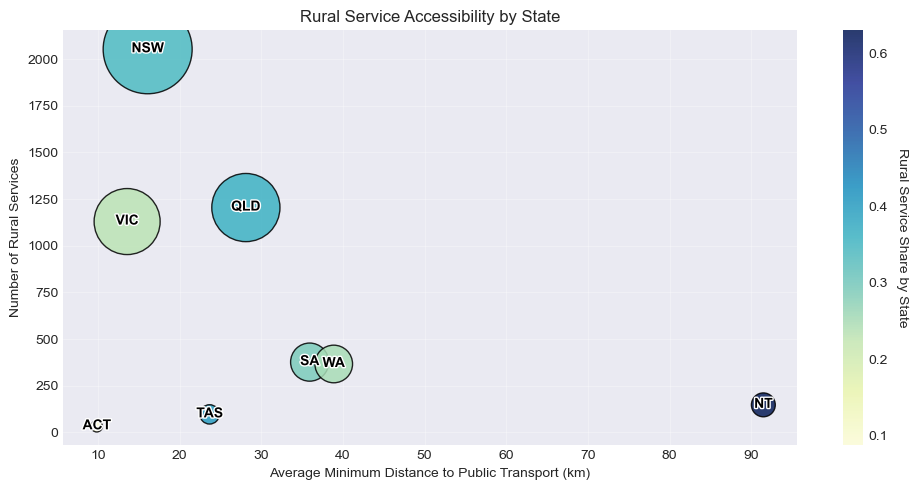

In [447]:
rural_classes = ['Rural', 'Rural Balance', 'Bounded Locality'] 
state_total = result.groupby('State', dropna=False)['MinDistance'].size().rename('TotalCount')
state_rural = result[result['Urban_Rural'].isin(rural_classes)].groupby('State')['MinDistance'].size().rename('RuralCount')

rural_share_df = pd.concat([state_total, state_rural], axis=1).fillna(0)
rural_share_df['rural_share'] = rural_share_df['RuralCount'] / rural_share_df['TotalCount']

rural_df = result[result['Urban_Rural'].isin(rural_classes)].copy()
bubble = (rural_df.groupby('State')['MinDistance']
          .agg(['mean','size'])
          .reset_index()
          .rename(columns={'mean':'AvgDistance_km','size':'ServiceCount'}))

bubble = bubble.merge(rural_share_df[['rural_share']], left_on='State', right_index=True, how='left')

plt.figure(figsize=(10,5))
sc = plt.scatter(
    bubble['AvgDistance_km'],
    bubble['ServiceCount'],
    s=bubble['ServiceCount'] * 2,
    c=bubble['rural_share'],
    cmap='YlGnBu',
    edgecolors='black',
    alpha=0.85)


for _, row in bubble.iterrows():
    txt = plt.text(
        row['AvgDistance_km'], row['ServiceCount'], row['State'],
        ha='center', va='center', color='black', weight='bold', fontsize=10)
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='white'),
        path_effects.Normal()])

cbar = plt.colorbar(sc)
cbar.set_label('Rural Service Share by State', rotation=270, labelpad=15)
plt.xlabel("Average Minimum Distance to Public Transport (km)")
plt.ylabel("Number of Rural Services")
plt.title("Rural Service Accessibility by State")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

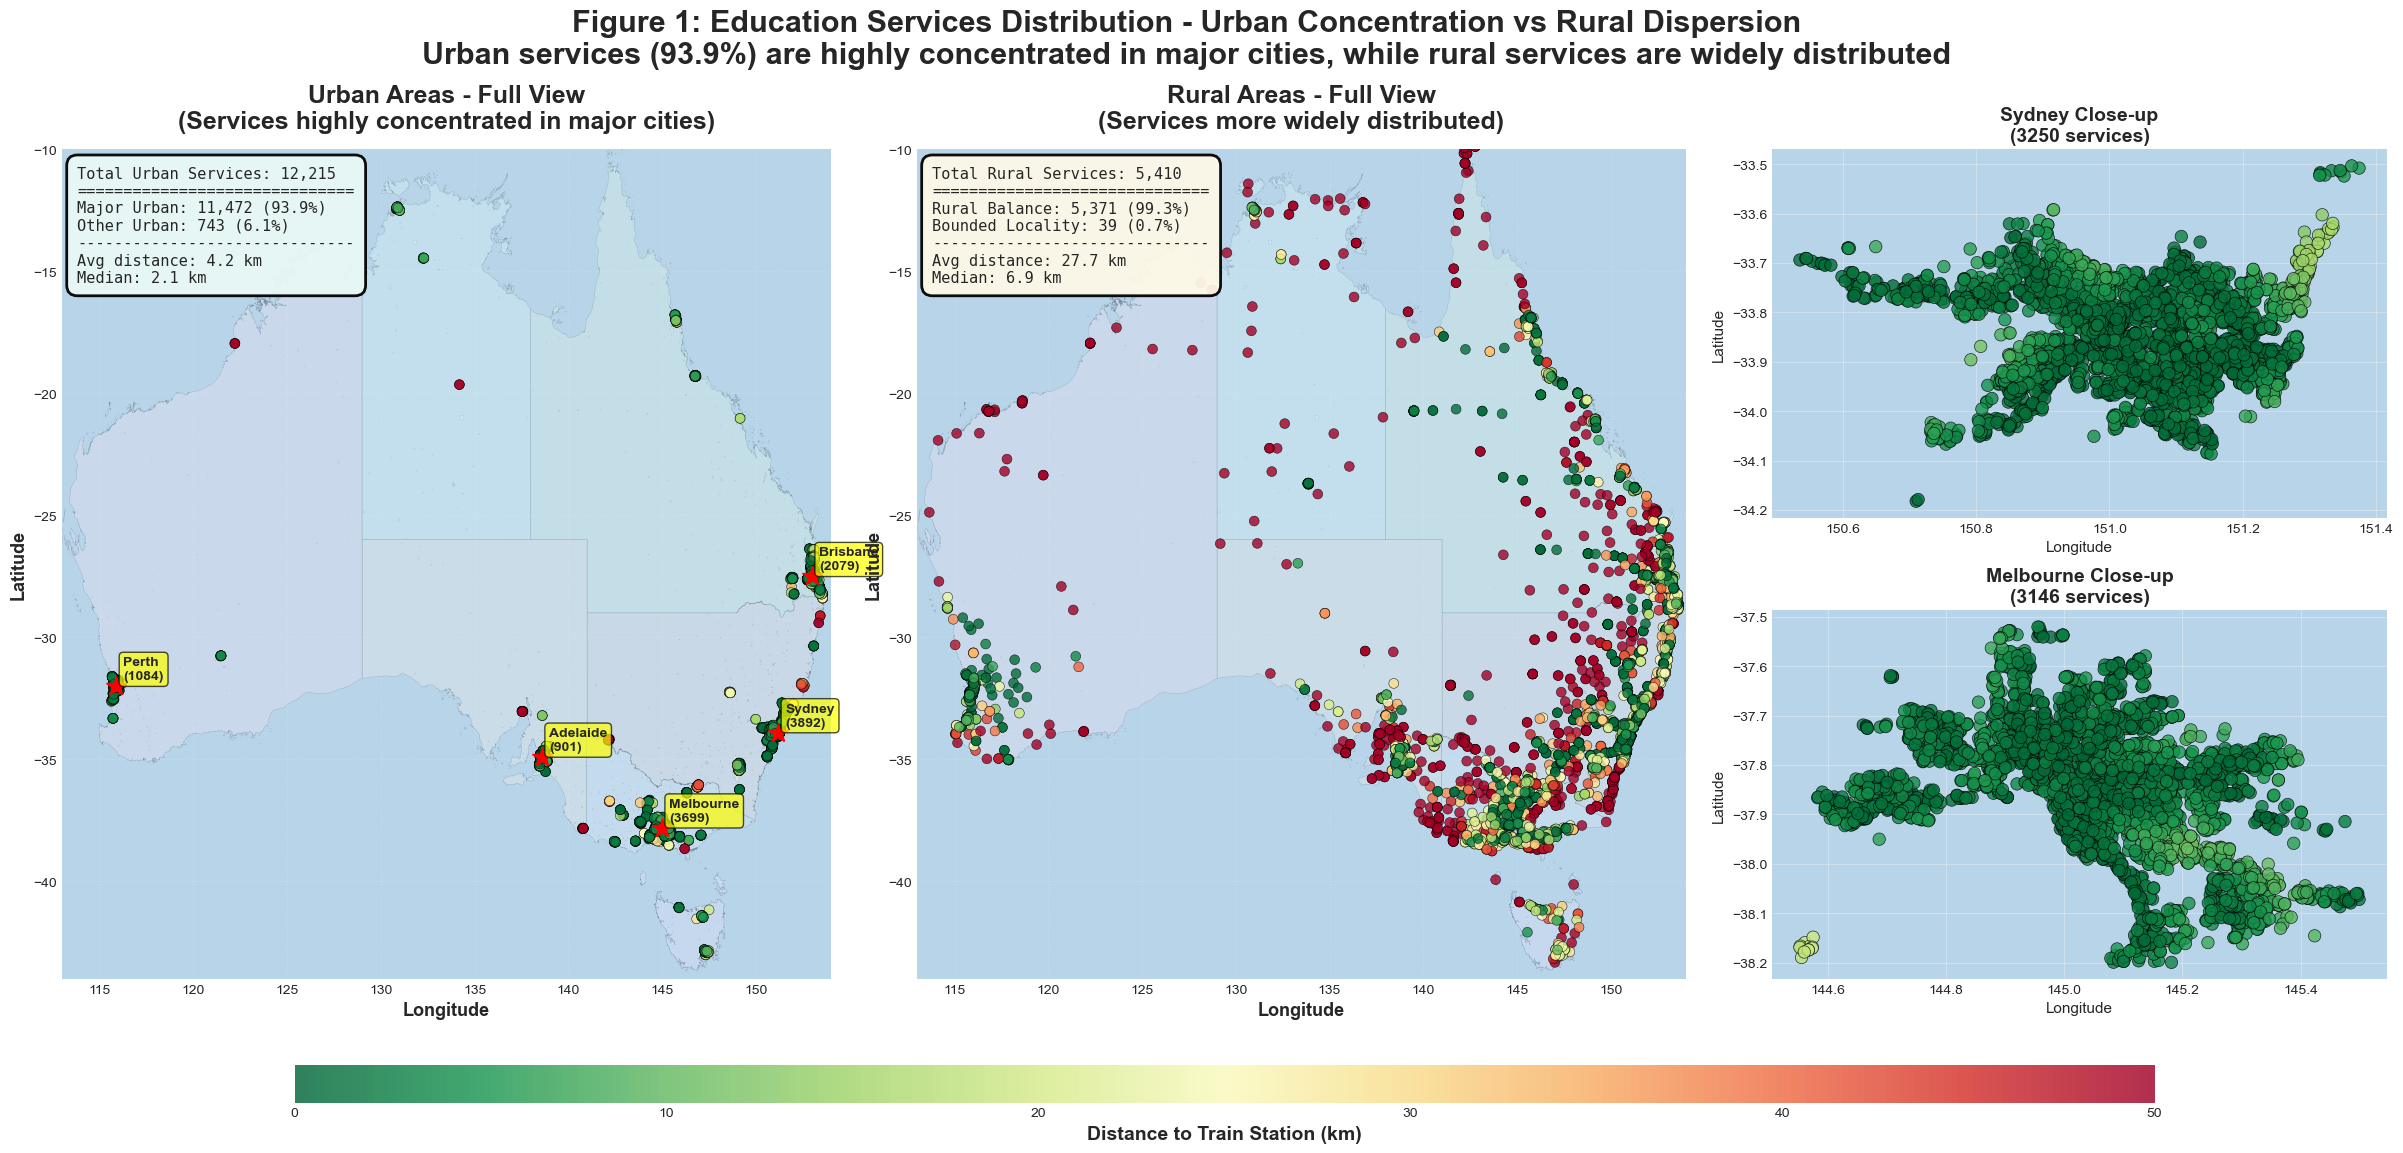

In [448]:
def extract_coords(geom_str):
    try:
        coords = str(geom_str).strip('c()').split(',')
        return float(coords[0]), float(coords[1])
    except:
        return None, None

result[['longitude', 'latitude']] = result['geometry'].apply(
    lambda x: pd.Series(extract_coords(x)) if pd.notna(x) else pd.Series([None, None])
)

df = result[(result['Urban_Rural'].isin(['Urban', 'Rural'])) & 
            (result['longitude'].notna()) & 
            (result['latitude'].notna())].copy()

# Create figure
fig = plt.figure(figsize=(30, 14))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 0.8], hspace=0.25, wspace=0.12)

# State colors
state_colors = {
    '1': '#FFE6E6', '2': '#E6F2FF', '3': '#E6FFE6', '4': '#FFF4E6',
    '5': '#FFE6F2', '6': '#F2E6FF', '7': '#E6FFFF', '8': '#FFFFF0',
}

# Left: Urban full view
ax1 = fig.add_subplot(gs[:, 0])
ax1.set_facecolor('#B8D4E8')

for _, sos_row in aus.iterrows():
    if sos_row.geometry is not None:
        sos_code = str(sos_row.get('SOS_CODE21', ''))
        state_prefix = sos_code[0] if len(sos_code) > 0 else '0'
        color = state_colors.get(state_prefix, '#f0f0f0')
        
        if isinstance(sos_row.geometry, Polygon):
            xs, ys = sos_row.geometry.exterior.xy
            ax1.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                    linewidth=0.3, alpha=0.25, zorder=1)
        elif isinstance(sos_row.geometry, MultiPolygon):
            for polygon in sos_row.geometry.geoms:
                xs, ys = polygon.exterior.xy
                ax1.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                        linewidth=0.3, alpha=0.25, zorder=1)

urban_df = df[df['Urban_Rural'] == 'Urban']
scatter1 = ax1.scatter(urban_df['longitude'], urban_df['latitude'],
                      c=urban_df['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=50, alpha=0.8,
                      edgecolors='black', linewidth=0.4,
                      vmin=0, vmax=50, zorder=3)

ax1.set_title('Urban Areas - Full View\n(Services highly concentrated in major cities)', 
             fontsize=18, fontweight='bold', pad=15)
ax1.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax1.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax1.set_xlim(113, 154)
ax1.set_ylim(-44, -10)
ax1.grid(True, alpha=0.2, linestyle=':')

cities = {
    'Sydney': (151.2, -33.9, 3892),
    'Melbourne': (145.0, -37.8, 3699),
    'Brisbane': (153.0, -27.5, 2079),
    'Perth': (115.9, -32.0, 1084),
    'Adelaide': (138.6, -34.9, 901)
}

for city, (lon, lat, count) in cities.items():
    ax1.plot(lon, lat, 'r*', markersize=15, zorder=4)
    ax1.annotate(f'{city}\n({count})', xy=(lon, lat), xytext=(5, 5),
                textcoords='offset points', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                zorder=5)

stats1 = f'Total Urban Services: {len(urban_df):,}\n'
stats1 += f'{"="*30}\n'
stats1 += f'Major Urban: {(urban_df["SOS_Name"]=="Major Urban").sum():,} (93.9%)\n'
stats1 += f'Other Urban: {(urban_df["SOS_Name"]=="Other Urban").sum():,} (6.1%)\n'
stats1 += f'{"-"*30}\n'
stats1 += f'Avg distance: {urban_df["DistanceToTrainStation_km"].mean():.1f} km\n'
stats1 += f'Median: {urban_df["DistanceToTrainStation_km"].median():.1f} km'

ax1.text(0.02, 0.98, stats1, transform=ax1.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#E8F8F5',
                 alpha=0.95, edgecolor='black', linewidth=2))

# Middle: Rural full view
ax2 = fig.add_subplot(gs[:, 1])
ax2.set_facecolor('#B8D4E8')

for _, sos_row in aus.iterrows():
    if sos_row.geometry is not None:
        sos_code = str(sos_row.get('SOS_CODE21', ''))
        state_prefix = sos_code[0] if len(sos_code) > 0 else '0'
        color = state_colors.get(state_prefix, '#f0f0f0')
        
        if isinstance(sos_row.geometry, Polygon):
            xs, ys = sos_row.geometry.exterior.xy
            ax2.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                    linewidth=0.3, alpha=0.25, zorder=1)
        elif isinstance(sos_row.geometry, MultiPolygon):
            for polygon in sos_row.geometry.geoms:
                xs, ys = polygon.exterior.xy
                ax2.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                        linewidth=0.3, alpha=0.25, zorder=1)

rural_df = df[df['Urban_Rural'] == 'Rural']
scatter2 = ax2.scatter(rural_df['longitude'], rural_df['latitude'],
                      c=rural_df['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=50, alpha=0.8,
                      edgecolors='black', linewidth=0.4,
                      vmin=0, vmax=50, zorder=3)

ax2.set_title('Rural Areas - Full View\n(Services more widely distributed)', 
             fontsize=18, fontweight='bold', pad=15)
ax2.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax2.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax2.set_xlim(113, 154)
ax2.set_ylim(-44, -10)
ax2.grid(True, alpha=0.2, linestyle=':')

stats2 = f'Total Rural Services: {len(rural_df):,}\n'
stats2 += f'{"="*30}\n'
stats2 += f'Rural Balance: {(rural_df["SOS_Name"]=="Rural Balance").sum():,} (99.3%)\n'
stats2 += f'Bounded Locality: {(rural_df["SOS_Name"]=="Bounded Locality").sum():,} (0.7%)\n'
stats2 += f'{"-"*30}\n'
stats2 += f'Avg distance: {rural_df["DistanceToTrainStation_km"].mean():.1f} km\n'
stats2 += f'Median: {rural_df["DistanceToTrainStation_km"].median():.1f} km'

ax2.text(0.02, 0.98, stats2, transform=ax2.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#FEF9E7',
                 alpha=0.95, edgecolor='black', linewidth=2))

# Right top: Sydney close-up
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_facecolor('#B8D4E8')

sydney_urban = urban_df[(urban_df['longitude'] > 150.5) & 
                        (urban_df['longitude'] < 151.5) &
                        (urban_df['latitude'] > -34.2) & 
                        (urban_df['latitude'] < -33.5)]

scatter3 = ax3.scatter(sydney_urban['longitude'], sydney_urban['latitude'],
                      c=sydney_urban['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=80, alpha=0.8,
                      edgecolors='black', linewidth=0.5,
                      vmin=0, vmax=50, zorder=3)

ax3.set_title(f'Sydney Close-up\n({len(sydney_urban)} services)', 
             fontsize=14, fontweight='bold')
ax3.set_xlabel('Longitude', fontsize=11)
ax3.set_ylabel('Latitude', fontsize=11)
ax3.grid(True, alpha=0.3)

# Right bottom: Melbourne close-up
ax4 = fig.add_subplot(gs[1, 2])
ax4.set_facecolor('#B8D4E8')

melbourne_urban = urban_df[(urban_df['longitude'] > 144.5) & 
                           (urban_df['longitude'] < 145.5) &
                           (urban_df['latitude'] > -38.2) & 
                           (urban_df['latitude'] < -37.5)]

scatter4 = ax4.scatter(melbourne_urban['longitude'], melbourne_urban['latitude'],
                      c=melbourne_urban['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=80, alpha=0.8,
                      edgecolors='black', linewidth=0.5,
                      vmin=0, vmax=50, zorder=3)

ax4.set_title(f'Melbourne Close-up\n({len(melbourne_urban)} services)', 
             fontsize=14, fontweight='bold')
ax4.set_xlabel('Longitude', fontsize=11)
ax4.set_ylabel('Latitude', fontsize=11)
ax4.grid(True, alpha=0.3)

# Title and colorbar
fig.suptitle('Figure 1: Education Services Distribution - Urban Concentration vs Rural Dispersion\n' +
            'Urban services (93.9%) are highly concentrated in major cities, while rural services are widely distributed',
            fontsize=22, fontweight='bold', y=0.98)

cbar = fig.colorbar(scatter2, ax=[ax1, ax2, ax3, ax4], 
                   location='bottom', pad=0.08, aspect=50, shrink=0.8)
cbar.set_label('Distance to Train Station (km)', fontsize=14, fontweight='bold')

plt.savefig('figure1_urban_rural_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [451]:

df['Annual Monday Start Time'] = pd.to_datetime(df['Annual Monday Start Time'], format='%H:%M:%S', errors='coerce')
df['Annual Monday End Time'] = pd.to_datetime(df['Annual Monday End Time'], format='%H:%M:%S', errors='coerce')

df['OpeningHoursAnnualMonday'] = (df['Annual Monday End Time'] - df['Annual Monday Start Time']).dt.total_seconds() / 3600
df['OpeningHoursAnnualMonday'].head() 

0    12.0
1    12.0
2    12.0
3    12.0
4    11.5
Name: OpeningHoursAnnualMonday, dtype: float64

In [452]:
df['OpeningHoursAnnualMonday'].value_counts()

OpeningHoursAnnualMonday
 12.000000    2937
 11.000000    2528
 11.500000    1379
 10.500000    1080
 10.000000     705
 8.000000      350
 7.500000      246
 9.500000      156
 9.000000      149
 6.000000      143
 8.500000       83
 11.250000      83
 23.983333      79
 10.250000      67
 6.500000       60
 3.000000       57
 7.000000       53
 10.750000      49
 12.500000      47
 11.750000      30
 2.000000       26
 5.000000       25
 9.750000       20
 6.250000       20
 0.083333       19
 13.000000      16
 3.500000       14
 7.750000       14
 9.250000       14
 3.250000       11
 0.000000       11
 2.500000       10
 8.750000       10
 8.250000        8
 3.166667        7
 6.750000        6
 1.500000        6
 13.500000       6
 2.750000        5
 6.166667        4
 2.666667        4
 5.500000        4
-1.000000        4
 14.000000       3
 2.250000        3
 5.750000        3
 4.000000        3
 4.250000        2
 11.666667       2
 3.333333        2
 2.833333        2
 17.50

In [453]:
df[df['OpeningHoursAnnualMonday']<0]
df.loc[df['OpeningHoursAnnualMonday'] < 0, 'OpeningHoursAnnualMonday'] += 12
df['OpeningHoursAnnualMonday'].value_counts()

OpeningHoursAnnualMonday
12.000000    2937
11.000000    2532
11.500000    1380
10.500000    1081
10.000000     707
8.000000      351
7.500000      246
9.500000      156
9.000000      149
6.000000      143
11.250000      83
8.500000       83
23.983333      79
10.250000      67
6.500000       60
3.000000       57
7.000000       53
10.750000      49
12.500000      47
11.750000      30
2.000000       26
5.000000       25
6.250000       20
9.750000       20
0.083333       19
13.000000      16
7.750000       14
3.500000       14
9.250000       14
3.250000       11
0.000000       11
2.500000       10
8.750000       10
8.250000        8
3.166667        7
13.500000       6
1.500000        6
6.750000        6
2.750000        5
5.500000        5
6.166667        4
2.666667        4
2.250000        3
4.000000        3
5.750000        3
14.000000       3
11.666667       2
3.333333        2
2.833333        2
17.500000       2
1.000000        2
1.250000        2
12.250000       2
1.750000        2
10.

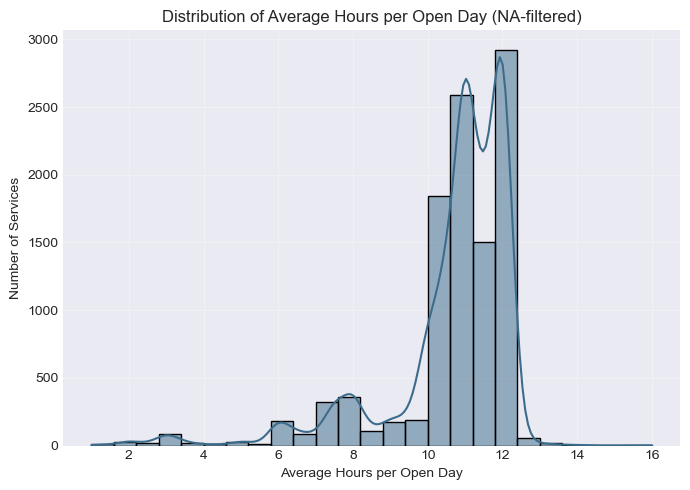

In [477]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
daily_cols = [f'OpeningHoursAnnual{d}' for d in days if f'OpeningHoursAnnual{d}' in df.columns]
df['AllDaysNA'] = df[daily_cols].isna().all(axis=1)

df['OpenDays'] = df[daily_cols].gt(0).sum(axis=1)
df.loc[df['AllDaysNA'], 'OpenDays'] = np.nan

df['DailyAvgHours_open'] = np.where(df['OpenDays'] > 0,
                                    df[daily_cols].sum(axis=1, skipna=True) / df['OpenDays'],
                                    np.nan)

plot_series = df.loc[df['DailyAvgHours_open'].between(1, 16, inclusive='both'),
                     'DailyAvgHours_open'].dropna()

plt.figure(figsize=(7,5))
sns.histplot(plot_series, bins=25, kde=True, color='#3C6C8B')
plt.title("Distribution of Average Hours per Open Day (NA-filtered)")
plt.xlabel("Average Hours per Open Day")
plt.ylabel("Number of Services")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

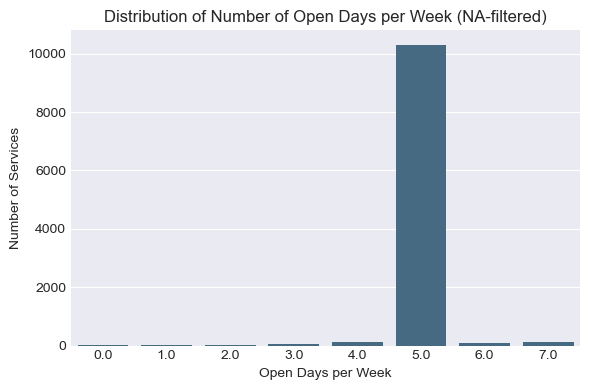

In [478]:
plt.figure(figsize=(6,4))
sns.countplot(x='OpenDays', data=df[~df['OpenDays'].isna()], color='#3C6C8B')
plt.title('Distribution of Number of Open Days per Week (NA-filtered)')
plt.xlabel('Open Days per Week')
plt.ylabel('Number of Services')
plt.tight_layout()
plt.show()

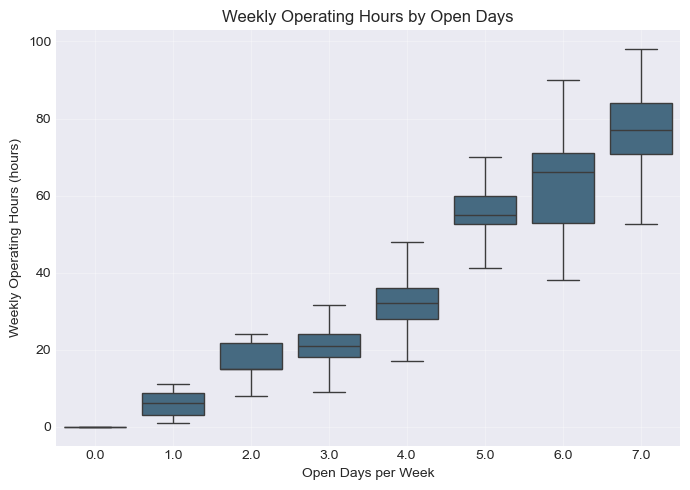

In [481]:
plt.figure(figsize=(7,5))
sns.boxplot(x='OpenDays', y='WeeklyHours',
            data=df[(~df['OpenDays'].isna()) & (df['WeeklyHours'].between(0, 100))], color='#3C6C8B', 
            showfliers=False)
plt.title('Weekly Operating Hours by Open Days')
plt.xlabel('Open Days per Week')
plt.ylabel('Weekly Operating Hours (hours)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

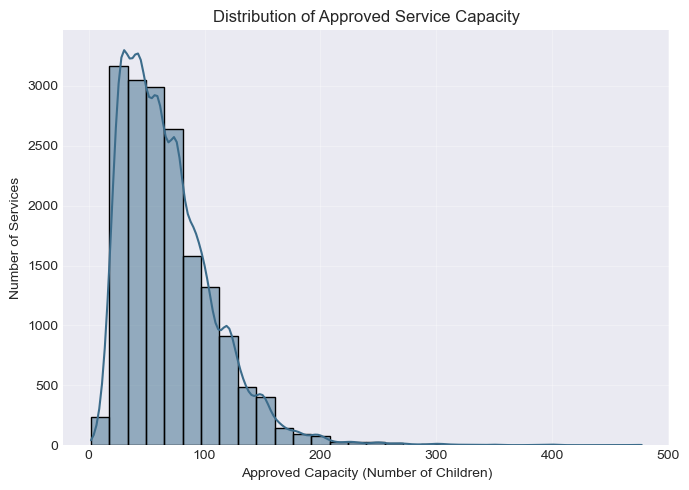

In [483]:
plt.figure(figsize=(7,5))
sns.histplot(df['NumberOfApprovedPlaces'].dropna(), bins=30, kde=True, color='#3C6C8B')
plt.title('Distribution of Approved Service Capacity')
plt.xlabel('Approved Capacity (Number of Children)')
plt.ylabel('Number of Services')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


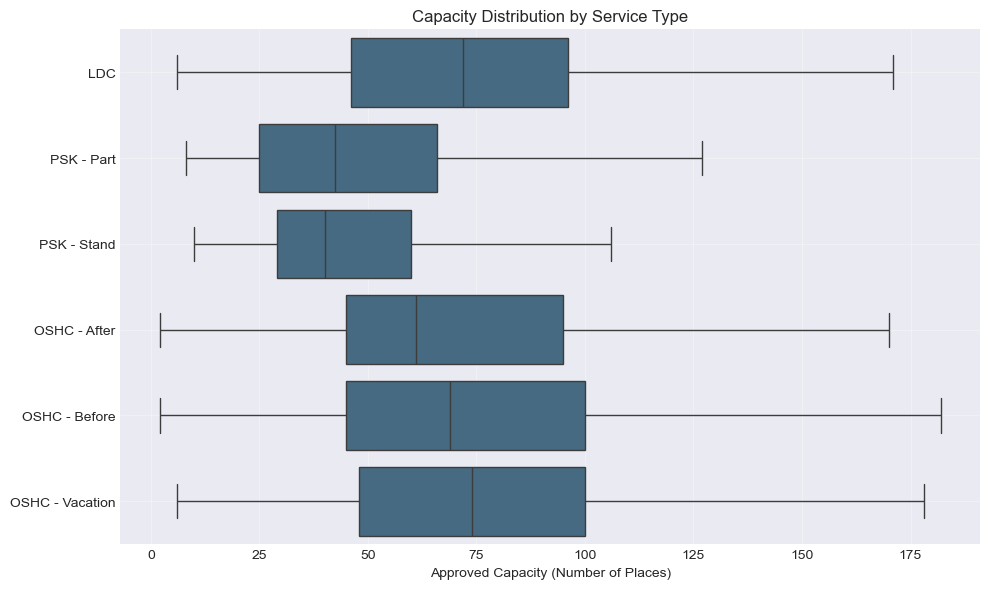

In [490]:
service_cols = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care'
]

# 1) melt 成长表（只保留 Yes）
df_capacity = df.melt(
    id_vars=['NumberOfApprovedPlaces'],
    value_vars=service_cols,
    var_name='ServiceType',
    value_name='HasService'
).query("HasService == 'Yes'").copy()

# 2) 数值化 + 过滤异常
df_capacity['NumberOfApprovedPlaces'] = pd.to_numeric(
    df_capacity['NumberOfApprovedPlaces'], errors='coerce'
)
df_capacity = df_capacity.dropna(subset=['NumberOfApprovedPlaces'])
df_capacity = df_capacity[df_capacity['NumberOfApprovedPlaces'].between(1, 300)]  # 按需调整上限

# 3) 可读的短名称（可选）
name_map = {
    'Long Day Care': 'LDC',
    'Preschool/Kindergarten - Part of a School': 'PSK - Part',
    'Preschool/Kindergarten - Stand alone': 'PSK - Stand',
    'Outside school Hours Care - After School': 'OSHC - After',
    'Outside school Hours Care - Before School': 'OSHC - Before',
    'Outside school Hours Care - Vacation Care': 'OSHC - Vacation'
}
df_capacity['ServiceTypeShort'] = df_capacity['ServiceType'].map(name_map)

# 4) 画箱线图（用 df_capacity！）
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_capacity,
    x='NumberOfApprovedPlaces',
    y='ServiceTypeShort',
    showfliers=False,
    orient='h',
    color='#3C6C8B'
)
plt.title('Capacity Distribution by Service Type')
plt.xlabel('Approved Capacity (Number of Places)')
plt.ylabel('')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

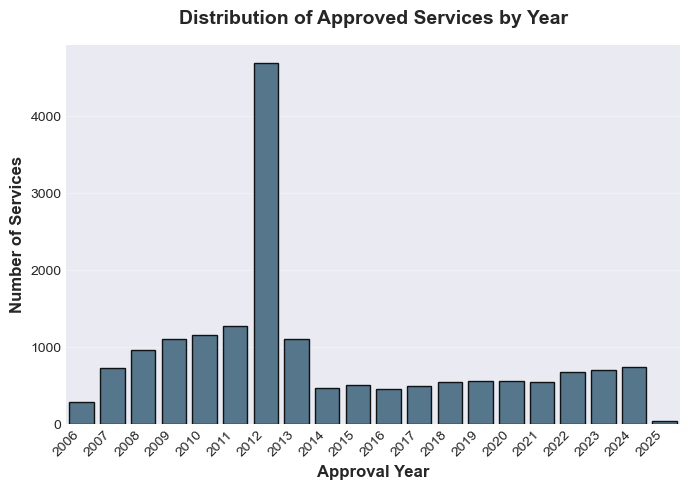

In [506]:
df['ServiceApprovalGrantedDate'] = pd.to_datetime(
    df['ServiceApprovalGrantedDate'], dayfirst=True, errors='coerce'
)
df['ApprovalYear'] = df['ServiceApprovalGrantedDate'].dt.year

# 2) 统计每年数量（只显示实际存在的年份；想从2006起就加最后一行筛选）
year_counts = (
    df['ApprovalYear']
    .dropna().astype(int)
    .value_counts()
    .sort_index()
)
# 只显示 2006+（不需要就注释掉这一行）
year_counts = year_counts[year_counts.index >= 2006]

# 3) 画柱状图（风格与容量直方图一致）
plt.figure(figsize=(7,5))
sns.barplot(x=year_counts.index, y=year_counts.values,
            color='#3C6C8B', edgecolor='black', alpha=0.9)

plt.title('Distribution of Approved Services by Year', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Approval Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Services', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

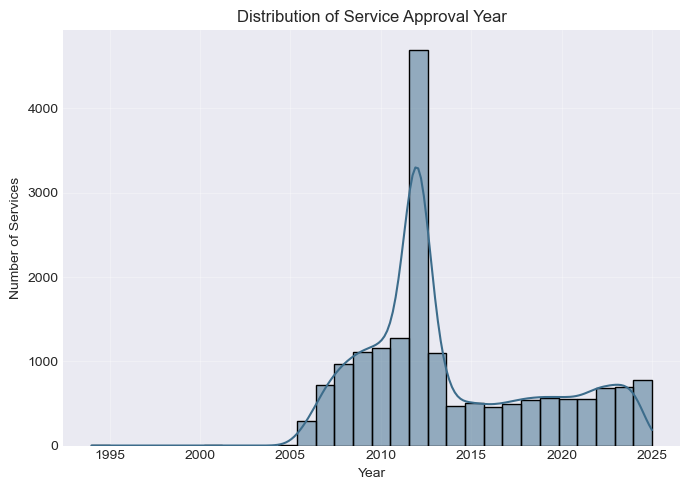

In [515]:
df['ServiceApprovalGrantedDate'] = pd.to_datetime(df['ServiceApprovalGrantedDate'], format='%d/%m/%Y', errors='coerce')
df['ApprovalYear'] = df['ServiceApprovalGrantedDate'].dt.year

# Create histogram
plt.figure(figsize=(7,5))
sns.histplot(df['ApprovalYear'].dropna(), bins=30, kde=True, color='#3C6C8B')
plt.title('Distribution of Service Approval Year')
plt.xlabel('Year')
# plt.xlim(2000, None)  
plt.ylabel('Number of Services')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

绘图数据: 9156 个服务


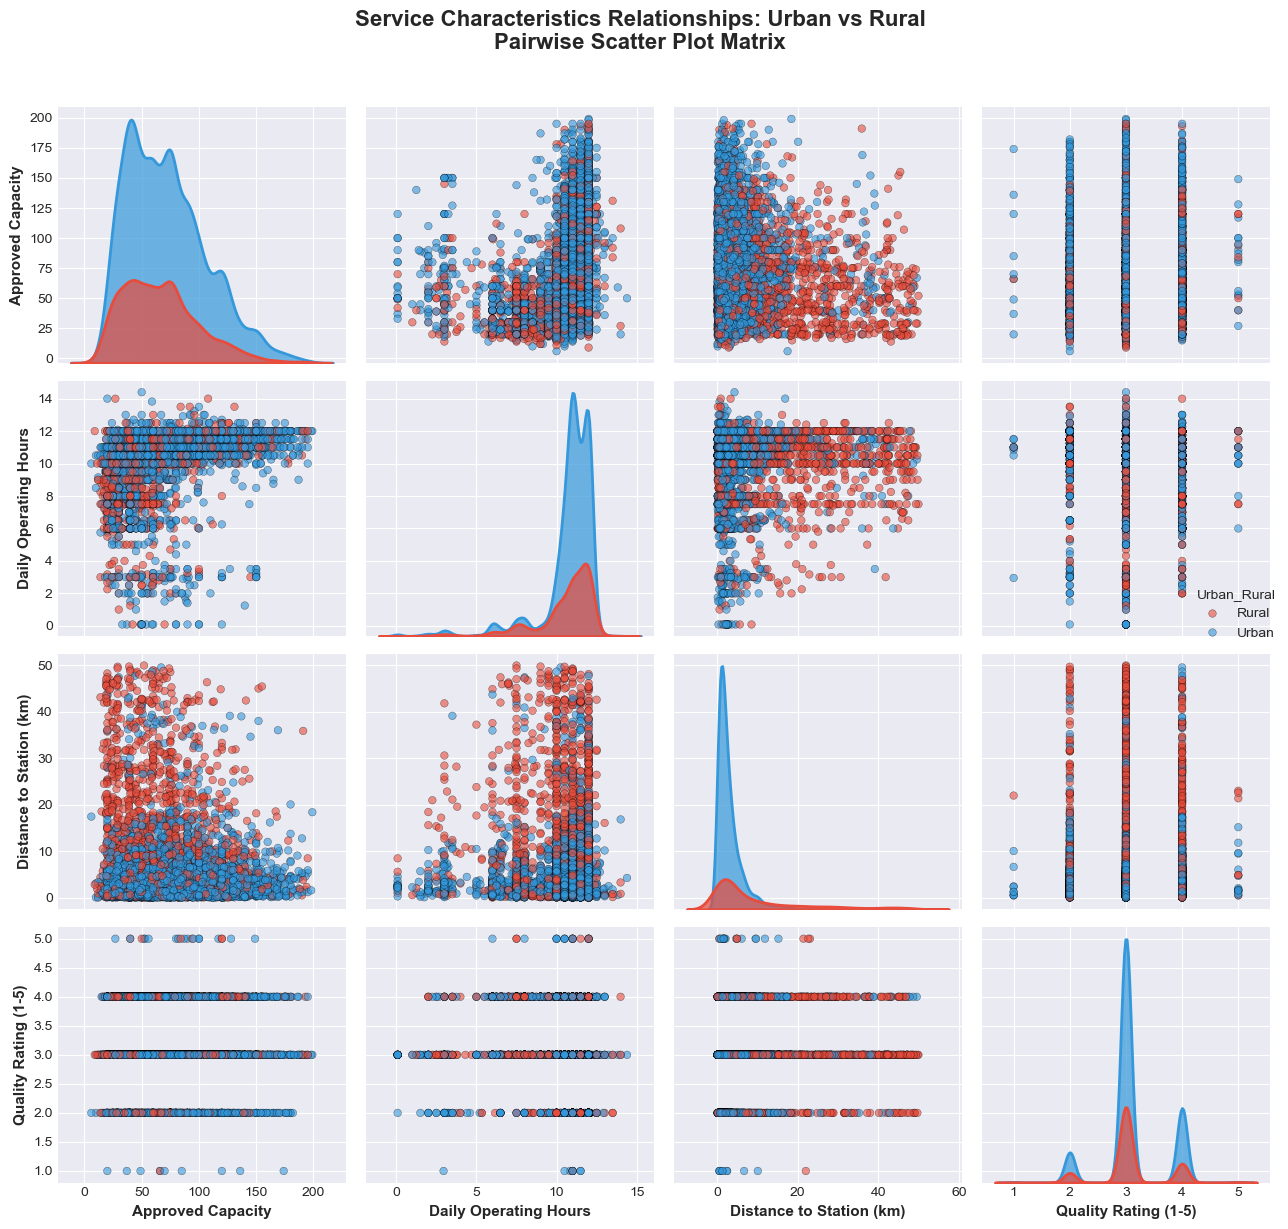

In [520]:
# 准备数据
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

df['ApprovalYear'] = pd.to_datetime(df['ServiceApprovalGrantedDate'], 
                                     format='%d/%m/%Y', errors='coerce').dt.year

# 选择关键变量
plot_vars = [
    'NumberOfApprovedPlaces',
    'DailyAvgHours_open', 
    'DistanceToTrainStation_km',
    'RatingScore'
]

# 过滤数据
plot_data = df[plot_vars + ['Urban_Rural']].dropna()

# 为了可视化效果，过滤极端值
plot_data = plot_data[
    (plot_data['NumberOfApprovedPlaces'] < 200) &
    (plot_data['DailyAvgHours_open'] < 15) &
    (plot_data['DistanceToTrainStation_km'] < 50)
]

print(f"绘图数据: {len(plot_data)} 个服务")

# 创建散点图矩阵
g = sns.pairplot(
    plot_data, 
    hue='Urban_Rural',
    palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black', 'linewidth': 0.3},
    diag_kws={'alpha': 0.7, 'linewidth': 2},
    height=3,
    aspect=1
)

# 自定义标签
labels = [
    'Approved Capacity',
    'Daily Operating Hours',
    'Distance to Station (km)',
    'Quality Rating (1-5)'
]

for i in range(len(plot_vars)):
    for j in range(len(plot_vars)):
        ax = g.axes[i, j]
        if i == len(plot_vars) - 1:
            ax.set_xlabel(labels[j], fontsize=11, fontweight='bold')
        if j == 0:
            ax.set_ylabel(labels[i], fontsize=11, fontweight='bold')

g.fig.suptitle('Service Characteristics Relationships: Urban vs Rural\nPairwise Scatter Plot Matrix', 
              fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('pairplot_urban_rural.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

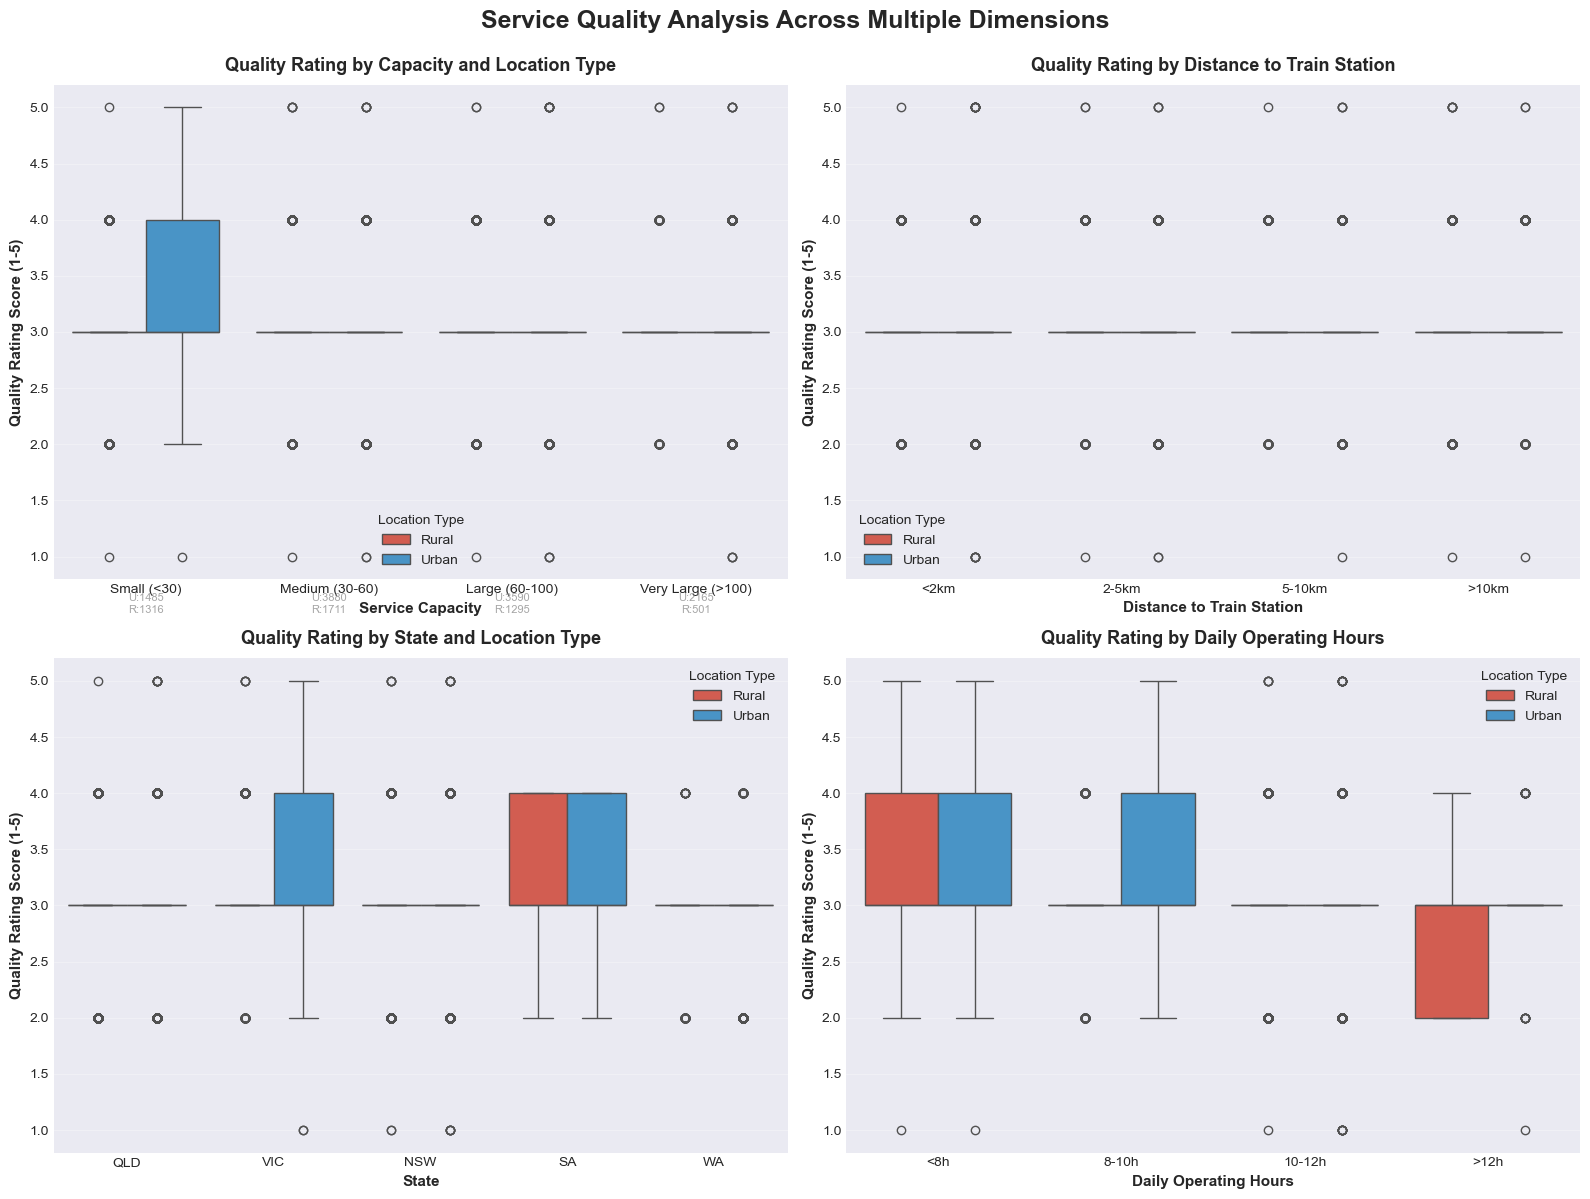


多维度质量分析结果

1. 按容量分组的平均质量评分:
  Small (<30): Urban=3.23, Rural=3.12, Diff=0.11
  Medium (30-60): Urban=3.17, Rural=3.11, Diff=0.06
  Large (60-100): Urban=3.12, Rural=3.04, Diff=0.08
  Very Large (>100): Urban=3.09, Rural=3.06, Diff=0.04

2. 按距离分组的平均质量评分:
  <2km: Urban=3.14, Rural=3.11, Diff=0.03
  2-5km: Urban=3.14, Rural=3.08, Diff=0.06
  5-10km: Urban=3.14, Rural=3.08, Diff=0.06
  >10km: Urban=3.11, Rural=3.10, Diff=0.00

3. 按州的平均质量评分:
  NSW: Urban=3.13, Rural=3.13, Diff=0.00
  VIC: Urban=3.25, Rural=3.16, Diff=0.09
  QLD: Urban=3.08, Rural=3.03, Diff=0.05
  SA: Urban=3.13, Rural=3.19, Diff=-0.05
  WA: Urban=2.90, Rural=2.83, Diff=0.07


In [521]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 创建容量分组
df['CapacityGroup'] = pd.cut(df['NumberOfApprovedPlaces'], 
                              bins=[0, 30, 60, 100, 500],
                              labels=['Small (<30)', 'Medium (30-60)', 'Large (60-100)', 'Very Large (>100)'])

# 创建距离分组
df['DistanceGroup'] = pd.cut(df['DistanceToTrainStation_km'],
                              bins=[0, 2, 5, 10, 100],
                              labels=['<2km', '2-5km', '5-10km', '>10km'])

# ============================================================================
# 图1: 多维度箱线图
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Service Quality Analysis Across Multiple Dimensions', 
            fontsize=18, fontweight='bold', y=0.995)

# 左上: 按Urban/Rural和容量组
ax1 = axes[0, 0]
plot_data1 = df[df['CapacityGroup'].notna() & df['RatingScore'].notna()].copy()
sns.boxplot(data=plot_data1, x='CapacityGroup', y='RatingScore', 
           hue='Urban_Rural', palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
           ax=ax1)
ax1.set_title('Quality Rating by Capacity and Location Type', 
             fontsize=13, fontweight='bold', pad=10)
ax1.set_xlabel('Service Capacity', fontsize=11, fontweight='bold')
ax1.set_ylabel('Quality Rating Score (1-5)', fontsize=11, fontweight='bold')
ax1.legend(title='Location Type', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# 添加样本量注释
for i, capacity in enumerate(plot_data1['CapacityGroup'].cat.categories):
    urban_n = len(plot_data1[(plot_data1['CapacityGroup']==capacity) & 
                             (plot_data1['Urban_Rural']=='Urban')])
    rural_n = len(plot_data1[(plot_data1['CapacityGroup']==capacity) & 
                             (plot_data1['Urban_Rural']=='Rural')])
    ax1.text(i, 0.5, f'U:{urban_n}\nR:{rural_n}', ha='center', 
            fontsize=8, color='gray', alpha=0.7)

# 右上: 按距离组和Urban/Rural
ax2 = axes[0, 1]
plot_data2 = df[df['DistanceGroup'].notna() & df['RatingScore'].notna()].copy()
sns.boxplot(data=plot_data2, x='DistanceGroup', y='RatingScore',
           hue='Urban_Rural', palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
           ax=ax2)
ax2.set_title('Quality Rating by Distance to Train Station', 
             fontsize=13, fontweight='bold', pad=10)
ax2.set_xlabel('Distance to Train Station', fontsize=11, fontweight='bold')
ax2.set_ylabel('Quality Rating Score (1-5)', fontsize=11, fontweight='bold')
ax2.legend(title='Location Type', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 左下: 按州和Urban/Rural
ax3 = axes[1, 0]
plot_data3 = df[df['RatingScore'].notna()].copy()
# 只显示主要州
major_states = ['NSW', 'VIC', 'QLD', 'SA', 'WA']
plot_data3 = plot_data3[plot_data3['State'].isin(major_states)]
sns.boxplot(data=plot_data3, x='State', y='RatingScore',
           hue='Urban_Rural', palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
           ax=ax3)
ax3.set_title('Quality Rating by State and Location Type', 
             fontsize=13, fontweight='bold', pad=10)
ax3.set_xlabel('State', fontsize=11, fontweight='bold')
ax3.set_ylabel('Quality Rating Score (1-5)', fontsize=11, fontweight='bold')
ax3.legend(title='Location Type', fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# 右下: 营业时间组和质量
ax4 = axes[1, 1]
plot_data4 = df[df['DailyAvgHours_open'].notna() & df['RatingScore'].notna()].copy()
plot_data4['HoursGroup'] = pd.cut(plot_data4['DailyAvgHours_open'],
                                  bins=[0, 8, 10, 12, 16],
                                  labels=['<8h', '8-10h', '10-12h', '>12h'])
plot_data4 = plot_data4[plot_data4['HoursGroup'].notna()]
sns.boxplot(data=plot_data4, x='HoursGroup', y='RatingScore',
           hue='Urban_Rural', palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
           ax=ax4)
ax4.set_title('Quality Rating by Daily Operating Hours', 
             fontsize=13, fontweight='bold', pad=10)
ax4.set_xlabel('Daily Operating Hours', fontsize=11, fontweight='bold')
ax4.set_ylabel('Quality Rating Score (1-5)', fontsize=11, fontweight='bold')
ax4.legend(title='Location Type', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('quality_multidimensional_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 输出关键统计
# ============================================================================

print("\n" + "="*80)
print("多维度质量分析结果")
print("="*80)

print("\n1. 按容量分组的平均质量评分:")
for capacity in plot_data1['CapacityGroup'].cat.categories:
    urban_avg = plot_data1[(plot_data1['CapacityGroup']==capacity) & 
                           (plot_data1['Urban_Rural']=='Urban')]['RatingScore'].mean()
    rural_avg = plot_data1[(plot_data1['CapacityGroup']==capacity) & 
                           (plot_data1['Urban_Rural']=='Rural')]['RatingScore'].mean()
    print(f"  {capacity}: Urban={urban_avg:.2f}, Rural={rural_avg:.2f}, Diff={urban_avg-rural_avg:.2f}")

print("\n2. 按距离分组的平均质量评分:")
for distance in plot_data2['DistanceGroup'].cat.categories:
    urban_avg = plot_data2[(plot_data2['DistanceGroup']==distance) & 
                           (plot_data2['Urban_Rural']=='Urban')]['RatingScore'].mean()
    rural_avg = plot_data2[(plot_data2['DistanceGroup']==distance) & 
                           (plot_data2['Urban_Rural']=='Rural')]['RatingScore'].mean()
    print(f"  {distance}: Urban={urban_avg:.2f}, Rural={rural_avg:.2f}, Diff={urban_avg-rural_avg:.2f}")

print("\n3. 按州的平均质量评分:")
for state in major_states:
    urban_avg = plot_data3[(plot_data3['State']==state) & 
                           (plot_data3['Urban_Rural']=='Urban')]['RatingScore'].mean()
    rural_avg = plot_data3[(plot_data3['State']==state) & 
                           (plot_data3['Urban_Rural']=='Rural')]['RatingScore'].mean()
    print(f"  {state}: Urban={urban_avg:.2f}, Rural={rural_avg:.2f}, Diff={urban_avg-rural_avg:.2f}")

print("="*80)







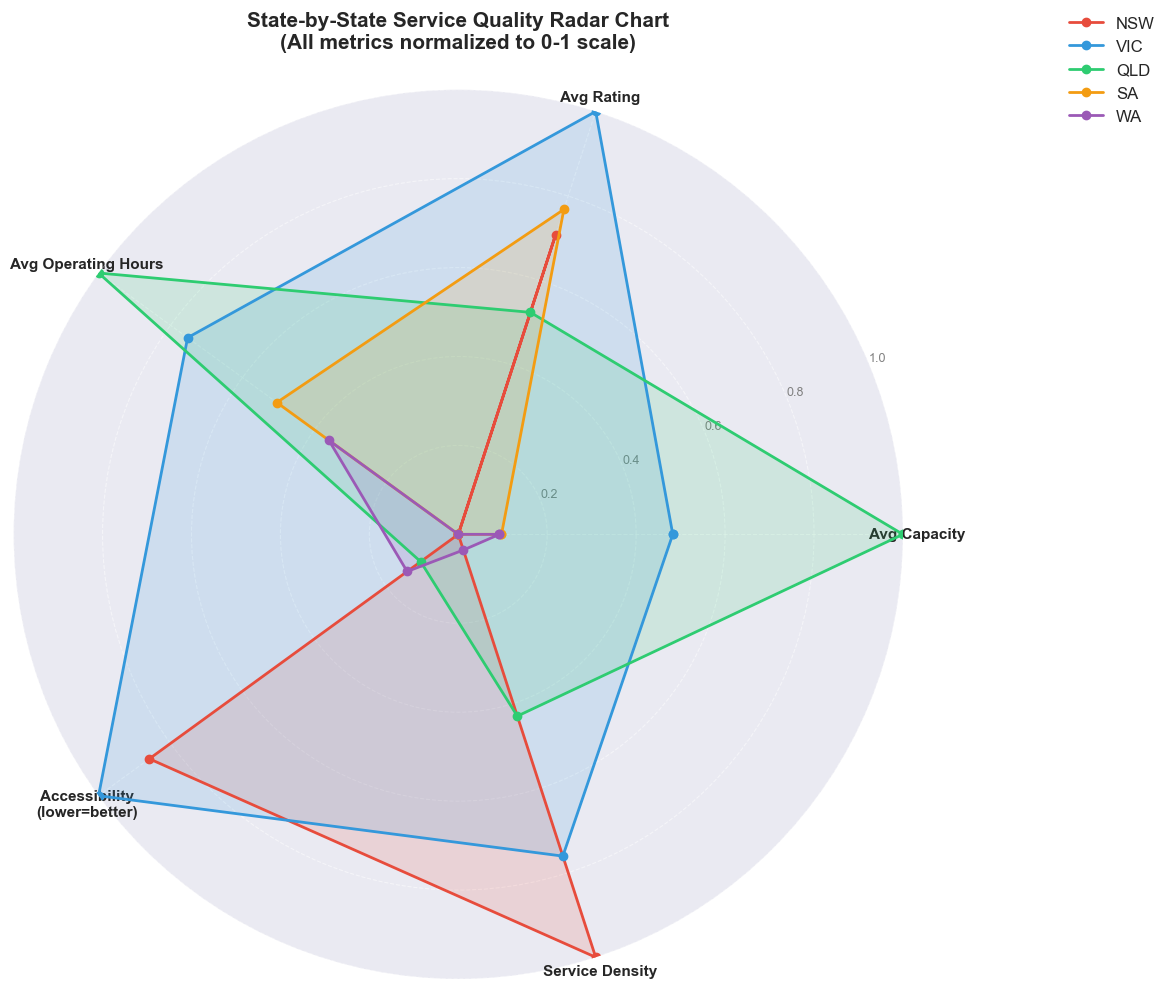


原始数据 (标准化前):

NSW:
  平均容量: 62.1
  平均评分: 3.13
  平均营业时间: 10.3小时
  平均距离车站: 8.4公里
  服务数量: 5945

VIC:
  平均容量: 71.2
  平均评分: 3.23
  平均营业时间: 11.1小时
  平均距离车站: 7.0公里
  服务数量: 4829

QLD:
  平均容量: 80.9
  平均评分: 3.07
  平均营业时间: 11.4小时
  平均距离车站: 15.9公里
  服务数量: 3284

SA:
  平均容量: 63.9
  平均评分: 3.15
  平均营业时间: 10.9小时
  平均距离车站: 16.9公里
  服务数量: 1278

WA:
  平均容量: 63.8
  平均评分: 2.88
  平均营业时间: 10.7小时
  平均距离车站: 15.5公里
  服务数量: 1451


In [523]:
from math import pi

rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 按州计算标准化指标
states = ['NSW', 'VIC', 'QLD', 'SA', 'WA']
metrics = {
    'Avg Capacity': [],
    'Avg Rating': [],
    'Avg Operating Hours': [],
    'Accessibility\n(lower=better)': [],
    'Service Density': []
}

for state in states:
    state_data = df[df['State'] == state]
    metrics['Avg Capacity'].append(state_data['NumberOfApprovedPlaces'].mean())
    metrics['Avg Rating'].append(state_data['RatingScore'].mean())
    metrics['Avg Operating Hours'].append(state_data['DailyAvgHours_open'].mean())
    metrics['Accessibility\n(lower=better)'].append(state_data['DistanceToTrainStation_km'].mean())
    metrics['Service Density'].append(len(state_data))

# 标准化到0-1范围
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

radar_data = pd.DataFrame(metrics, index=states)

# 距离指标反向（越小越好）
radar_data['Accessibility\n(lower=better)'] = 1 - scaler.fit_transform(
    radar_data[['Accessibility\n(lower=better)']]
).flatten()

# 其他指标正向标准化
for col in ['Avg Capacity', 'Avg Rating', 'Avg Operating Hours', 'Service Density']:
    radar_data[col] = scaler.fit_transform(radar_data[[col]]).flatten()

# 绘制雷达图
categories = list(radar_data.columns)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for idx, state in enumerate(states):
    values = radar_data.loc[state].tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=state, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9, color='gray')
ax.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12, framealpha=0.9)
plt.title('State-by-State Service Quality Radar Chart\n(All metrics normalized to 0-1 scale)',
         fontsize=15, fontweight='bold', pad=30)

plt.tight_layout()
plt.savefig('radar_chart_states.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 输出原始数据
print("\n原始数据 (标准化前):")
print("="*80)
for state in states:
    state_data = df[df['State'] == state]
    print(f"\n{state}:")
    print(f"  平均容量: {state_data['NumberOfApprovedPlaces'].mean():.1f}")
    print(f"  平均评分: {state_data['RatingScore'].mean():.2f}")
    print(f"  平均营业时间: {state_data['DailyAvgHours_open'].mean():.1f}小时")
    print(f"  平均距离车站: {state_data['DistanceToTrainStation_km'].mean():.1f}公里")
    print(f"  服务数量: {len(state_data)}")


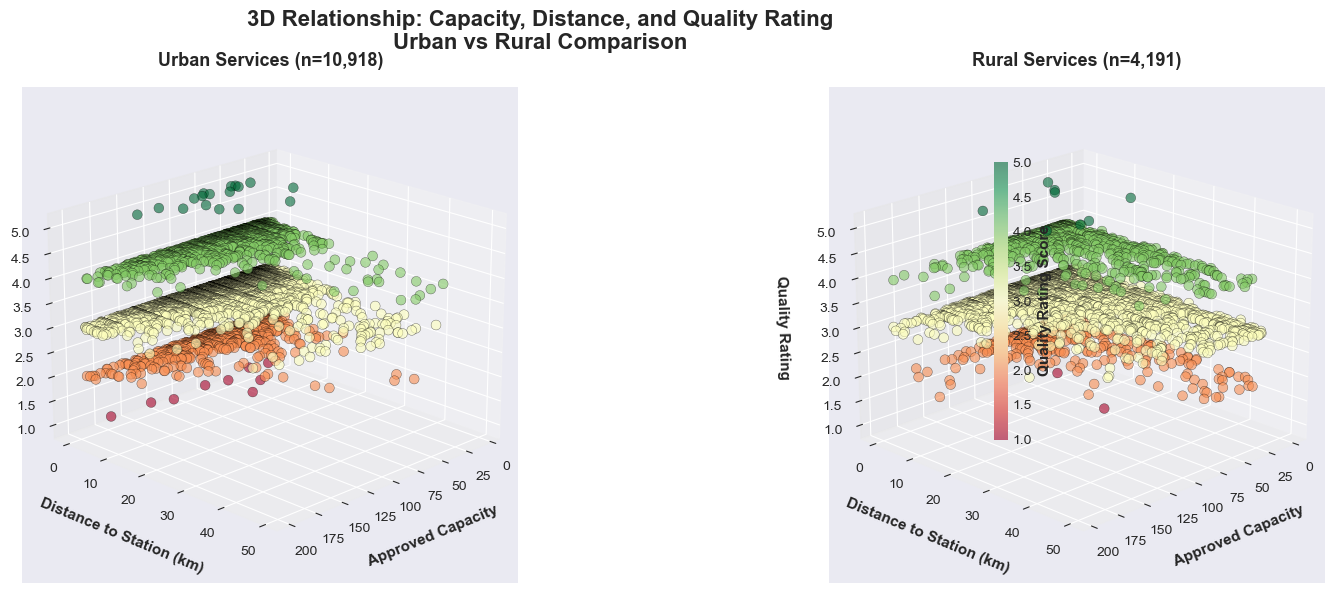

In [524]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 过滤数据
plot_data = df[
    (df['NumberOfApprovedPlaces'].notna()) &
    (df['DistanceToTrainStation_km'].notna()) &
    (df['RatingScore'].notna()) &
    (df['NumberOfApprovedPlaces'] < 200) &
    (df['DistanceToTrainStation_km'] < 50)
].copy()

# 创建图形
fig = plt.figure(figsize=(16, 6))

# 左图: Urban
ax1 = fig.add_subplot(121, projection='3d')
urban_data = plot_data[plot_data['Urban_Rural'] == 'Urban']
scatter1 = ax1.scatter(urban_data['NumberOfApprovedPlaces'],
                      urban_data['DistanceToTrainStation_km'],
                      urban_data['RatingScore'],
                      c=urban_data['RatingScore'],
                      cmap='RdYlGn',
                      s=50,
                      alpha=0.6,
                      edgecolors='black',
                      linewidth=0.3,
                      vmin=1, vmax=5)

ax1.set_xlabel('Approved Capacity', fontsize=11, fontweight='bold', labelpad=10)
ax1.set_ylabel('Distance to Station (km)', fontsize=11, fontweight='bold', labelpad=10)
ax1.set_zlabel('Quality Rating', fontsize=11, fontweight='bold', labelpad=10)
ax1.set_title(f'Urban Services (n={len(urban_data):,})', 
             fontsize=13, fontweight='bold', pad=15)
ax1.view_init(elev=20, azim=45)

# 右图: Rural
ax2 = fig.add_subplot(122, projection='3d')
rural_data = plot_data[plot_data['Urban_Rural'] == 'Rural']
scatter2 = ax2.scatter(rural_data['NumberOfApprovedPlaces'],
                      rural_data['DistanceToTrainStation_km'],
                      rural_data['RatingScore'],
                      c=rural_data['RatingScore'],
                      cmap='RdYlGn',
                      s=50,
                      alpha=0.6,
                      edgecolors='black',
                      linewidth=0.3,
                      vmin=1, vmax=5)

ax2.set_xlabel('Approved Capacity', fontsize=11, fontweight='bold', labelpad=10)
ax2.set_ylabel('Distance to Station (km)', fontsize=11, fontweight='bold', labelpad=10)
ax2.set_zlabel('Quality Rating', fontsize=11, fontweight='bold', labelpad=10)
ax2.set_title(f'Rural Services (n={len(rural_data):,})', 
             fontsize=13, fontweight='bold', pad=15)
ax2.view_init(elev=20, azim=45)

# 添加颜色条
cbar = fig.colorbar(scatter2, ax=[ax1, ax2], pad=0.1, shrink=0.6)
cbar.set_label('Quality Rating Score', fontsize=11, fontweight='bold')

fig.suptitle('3D Relationship: Capacity, Distance, and Quality Rating\nUrban vs Rural Comparison',
            fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('3d_scatter_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()




气泡图数据点: 24 个组合
包含 9478 个服务


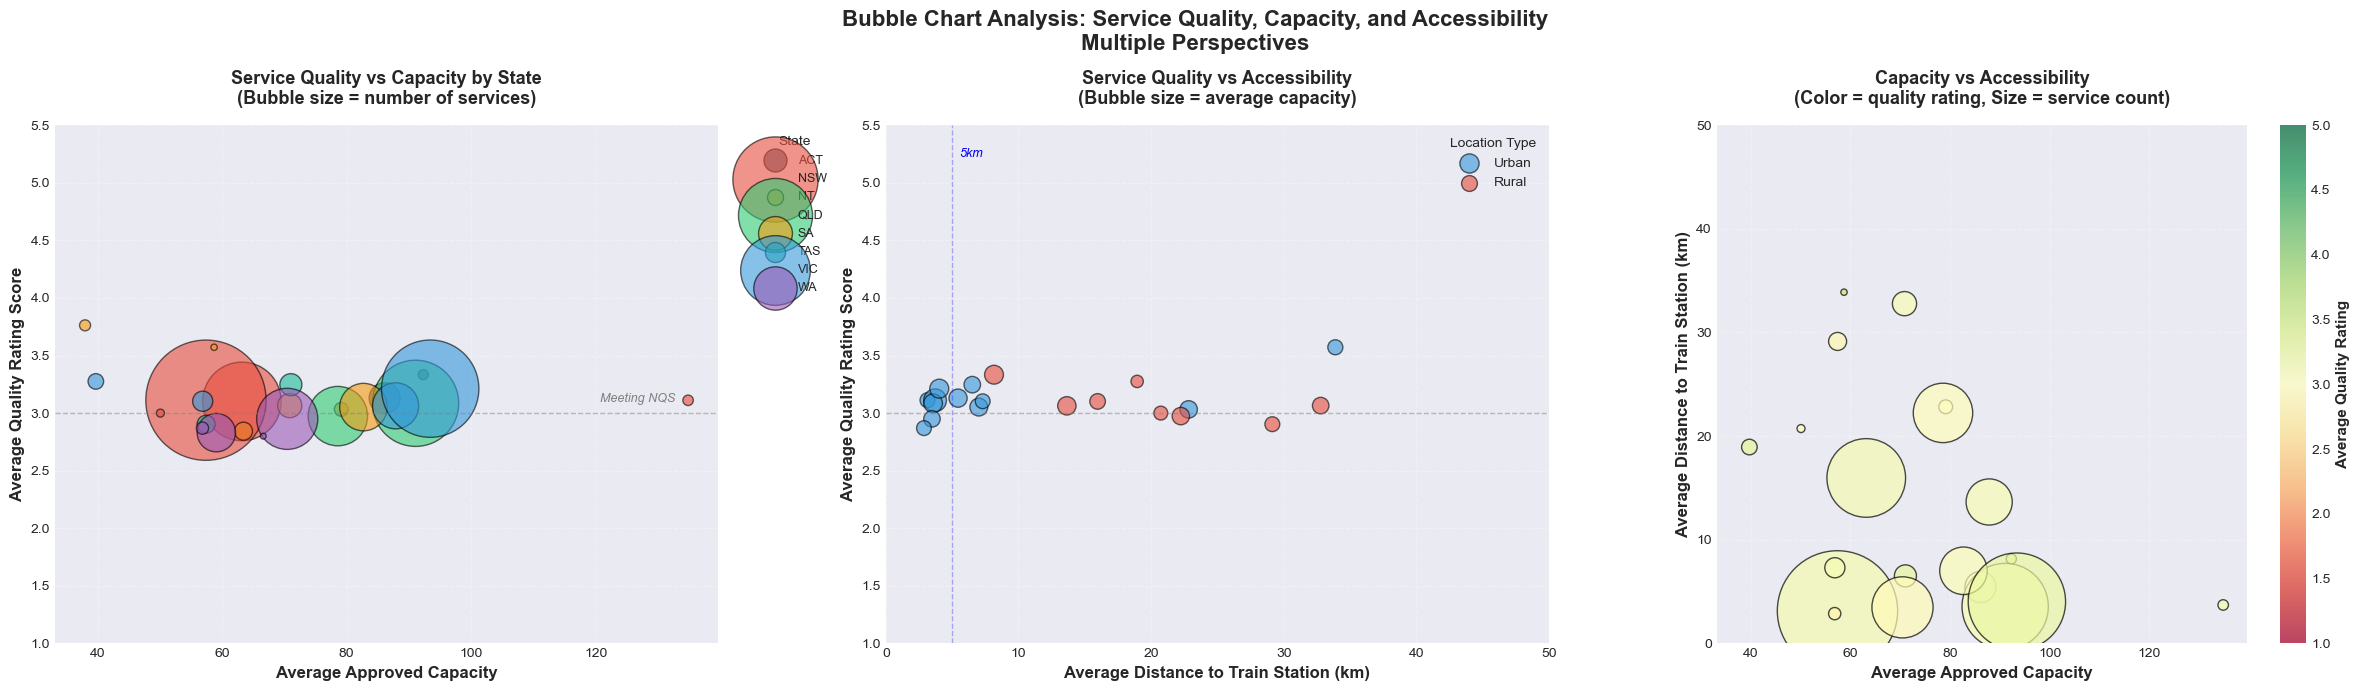


气泡图关键发现

1. 高质量 + 大容量的组合:
  无

2. 低距离 + 高质量的组合:
  无

3. 样本量最大的组合 (Top 5):
  NSW - Long Day Care (Urban): n=2501, 评分=3.11
  VIC - Long Day Care (Urban): n=1638, 评分=3.21
  QLD - Long Day Care (Urban): n=1286, 评分=3.09
  NSW - Long Day Care (Rural): n=1068, 评分=3.10
  WA - Long Day Care (Urban): n=646, 评分=2.95


In [527]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 服务类型列
service_type_cols = [
    'Long Day Care',
    'Preschool', 
    'Preschool/Kindergarten',
    'Outside school hours care - before and/or after school care',
    'Outside school hours care - vacation care',
    'Outside school hours care - other',
    'Other'
]

service_type_cols = [col for col in service_type_cols if col in df.columns]

# 获取主要服务类型
def get_primary_service(row):
    for col in service_type_cols:
        if str(row.get(col, '')).strip().lower() == 'yes':
            if 'Long Day Care' in col:
                return 'Long Day Care'
            elif 'Preschool' in col and 'Kindergarten' in col:
                return 'Preschool/Kinder'
            elif 'Preschool' in col:
                return 'Preschool'
            elif 'before and/or after' in col:
                return 'OSHC (Before/After)'
            elif 'vacation' in col:
                return 'OSHC (Vacation)'
            elif 'Outside school' in col:
                return 'OSHC (Other)'
            else:
                return 'Other'
    return 'Unknown'

df['PrimaryServiceType'] = df.apply(get_primary_service, axis=1)
df_filtered = df[df['PrimaryServiceType'] != 'Unknown'].copy()

# ============================================================================
# 按州和服务类型聚合数据
# ============================================================================

bubble_data = df_filtered.groupby(['State', 'PrimaryServiceType', 'Urban_Rural']).agg({
    'NumberOfApprovedPlaces': 'mean',
    'RatingScore': 'mean',
    'DistanceToTrainStation_km': 'mean',
    'ServiceName': 'count'  # 服务数量
}).reset_index()

bubble_data.columns = ['State', 'ServiceType', 'Location', 'AvgCapacity', 
                       'AvgRating', 'AvgDistance', 'Count']

# 过滤样本量太小的组合
bubble_data = bubble_data[bubble_data['Count'] >= 5]

print(f"气泡图数据点: {len(bubble_data)} 个组合")
print(f"包含 {bubble_data['Count'].sum()} 个服务")

# ============================================================================
# 绘制气泡图 - 三种组合
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# 配色
state_colors = {
    'NSW': '#e74c3c', 'VIC': '#3498db', 'QLD': '#2ecc71', 
    'SA': '#f39c12', 'WA': '#9b59b6', 'TAS': '#1abc9c',
    'NT': '#e67e22', 'ACT': '#34495e'
}

# ============================================================================
# 图1: 容量 vs 评分（气泡大小=服务数量，颜色=州）
# ============================================================================

ax1 = axes[0]

for state in bubble_data['State'].unique():
    state_data = bubble_data[bubble_data['State'] == state]
    ax1.scatter(state_data['AvgCapacity'], 
               state_data['AvgRating'],
               s=state_data['Count'] * 3,  # 气泡大小
               alpha=0.6,
               c=[state_colors.get(state, 'gray')],
               label=state,
               edgecolors='black',
               linewidth=1)

ax1.set_xlabel('Average Approved Capacity', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Quality Rating Score', fontsize=12, fontweight='bold')
ax1.set_title('Service Quality vs Capacity by State\n(Bubble size = number of services)',
             fontsize=13, fontweight='bold', pad=15)
ax1.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(alpha=0.3, linestyle='--')
ax1.set_ylim(1, 5.5)

# 添加参考线
ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.text(ax1.get_xlim()[1]*0.95, 3.1, 'Meeting NQS', 
        ha='right', fontsize=9, color='gray', style='italic')

# ============================================================================
# 图2: 距离 vs 评分（气泡大小=容量，颜色=Urban/Rural）
# ============================================================================

ax2 = axes[1]

location_colors = {'Urban': '#3498db', 'Rural': '#e74c3c'}

for location in ['Urban', 'Rural']:
    loc_data = bubble_data[bubble_data['Location'] == location]
    ax2.scatter(loc_data['AvgDistance'],
               loc_data['AvgRating'],
               s=loc_data['AvgCapacity'] * 2,  # 气泡大小=容量
               alpha=0.6,
               c=[location_colors[location]],
               label=location,
               edgecolors='black',
               linewidth=1)

ax2.set_xlabel('Average Distance to Train Station (km)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Quality Rating Score', fontsize=12, fontweight='bold')
ax2.set_title('Service Quality vs Accessibility\n(Bubble size = average capacity)',
             fontsize=13, fontweight='bold', pad=15)
ax2.legend(title='Location Type', fontsize=10)
ax2.grid(alpha=0.3, linestyle='--')
ax2.set_ylim(1, 5.5)
ax2.set_xlim(0, min(bubble_data['AvgDistance'].max(), 50))

# 添加参考线
ax2.axhline(y=3, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax2.axvline(x=5, color='blue', linestyle='--', alpha=0.3, linewidth=1)
ax2.text(5.5, ax2.get_ylim()[1]*0.95, '5km', fontsize=9, color='blue', style='italic')

# ============================================================================
# 图3: 容量 vs 距离（气泡大小=服务数量，颜色=评分）
# ============================================================================

ax3 = axes[2]

scatter = ax3.scatter(bubble_data['AvgCapacity'],
                     bubble_data['AvgDistance'],
                     s=bubble_data['Count'] * 3,
                     c=bubble_data['AvgRating'],
                     cmap='RdYlGn',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=1,
                     vmin=1, vmax=5)

ax3.set_xlabel('Average Approved Capacity', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Distance to Train Station (km)', fontsize=12, fontweight='bold')
ax3.set_title('Capacity vs Accessibility\n(Color = quality rating, Size = service count)',
             fontsize=13, fontweight='bold', pad=15)
ax3.grid(alpha=0.3, linestyle='--')
ax3.set_ylim(0, min(bubble_data['AvgDistance'].max(), 50))

# 颜色条
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Average Quality Rating', fontsize=11, fontweight='bold')

# 总标题
fig.suptitle('Bubble Chart Analysis: Service Quality, Capacity, and Accessibility\nMultiple Perspectives',
            fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('bubble_chart_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 输出关键发现
# ============================================================================

print("\n" + "="*80)
print("气泡图关键发现")
print("="*80)

print("\n1. 高质量 + 大容量的组合:")
high_quality_large = bubble_data[
    (bubble_data['AvgRating'] >= 4) & 
    (bubble_data['AvgCapacity'] >= 80)
].sort_values('AvgRating', ascending=False)

if len(high_quality_large) > 0:
    for _, row in high_quality_large.head().iterrows():
        print(f"  {row['State']} - {row['ServiceType']} ({row['Location']}): "
              f"评分={row['AvgRating']:.2f}, 容量={row['AvgCapacity']:.0f}, n={row['Count']}")
else:
    print("  无")

print("\n2. 低距离 + 高质量的组合:")
accessible_quality = bubble_data[
    (bubble_data['AvgDistance'] <= 5) & 
    (bubble_data['AvgRating'] >= 4)
].sort_values('AvgRating', ascending=False)

if len(accessible_quality) > 0:
    for _, row in accessible_quality.head().iterrows():
        print(f"  {row['State']} - {row['ServiceType']} ({row['Location']}): "
              f"评分={row['AvgRating']:.2f}, 距离={row['AvgDistance']:.1f}km, n={row['Count']}")
else:
    print("  无")

print("\n3. 样本量最大的组合 (Top 5):")
largest_groups = bubble_data.nlargest(5, 'Count')
for _, row in largest_groups.iterrows():
    print(f"  {row['State']} - {row['ServiceType']} ({row['Location']}): "
          f"n={row['Count']}, 评分={row['AvgRating']:.2f}")

print("="*80)


使用的服务类型列:
  Long Day Care: 9276 个 Yes
  Preschool/Kindergarten - Part of a School: 844 个 Yes
  Preschool/Kindergarten - Stand alone: 3034 个 Yes
  Outside school Hours Care - After School: 5946 个 Yes
  Outside school Hours Care - Before School: 5362 个 Yes
  Outside school Hours Care - Vacation Care: 4925 个 Yes

长格式数据: 29387 行

服务类型分布:
ServiceType
Long Day Care             9276
OSHC (After)              5946
OSHC (Before)             5362
OSHC (Vacation)           4925
Preschool (Standalone)    3034
Preschool (School)         844
Name: count, dtype: int64

透视表形状:
  评分: (8, 6)
  容量: (8, 6)
  数量: (8, 6)


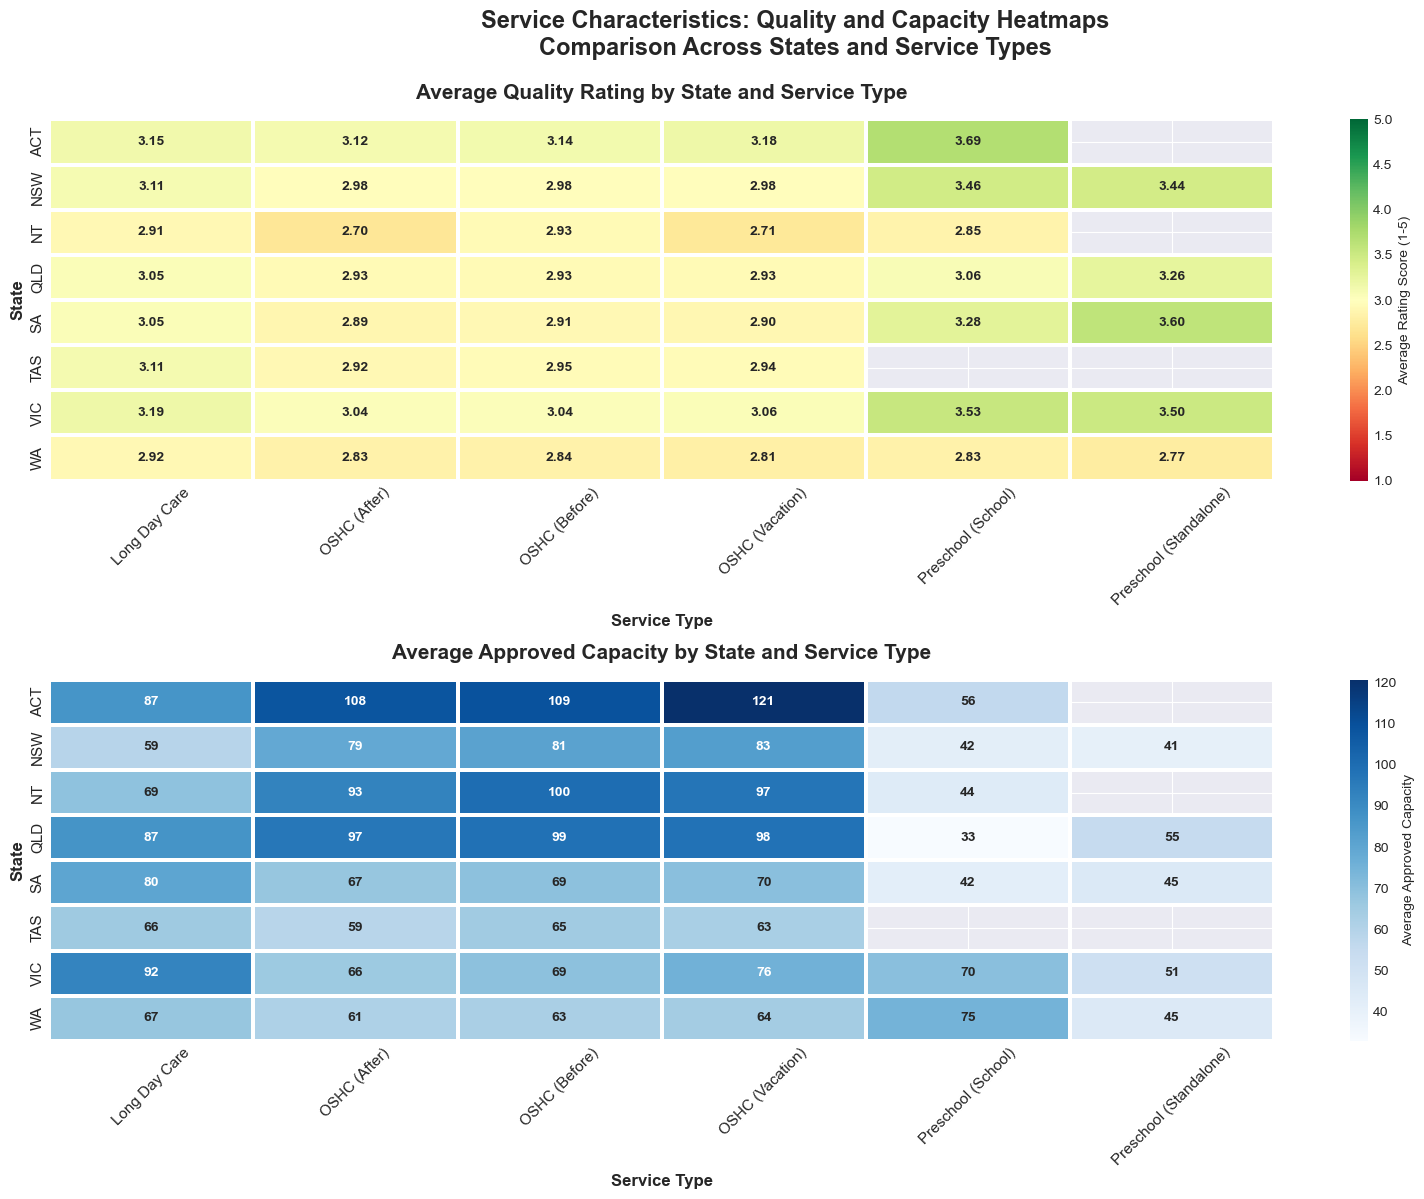

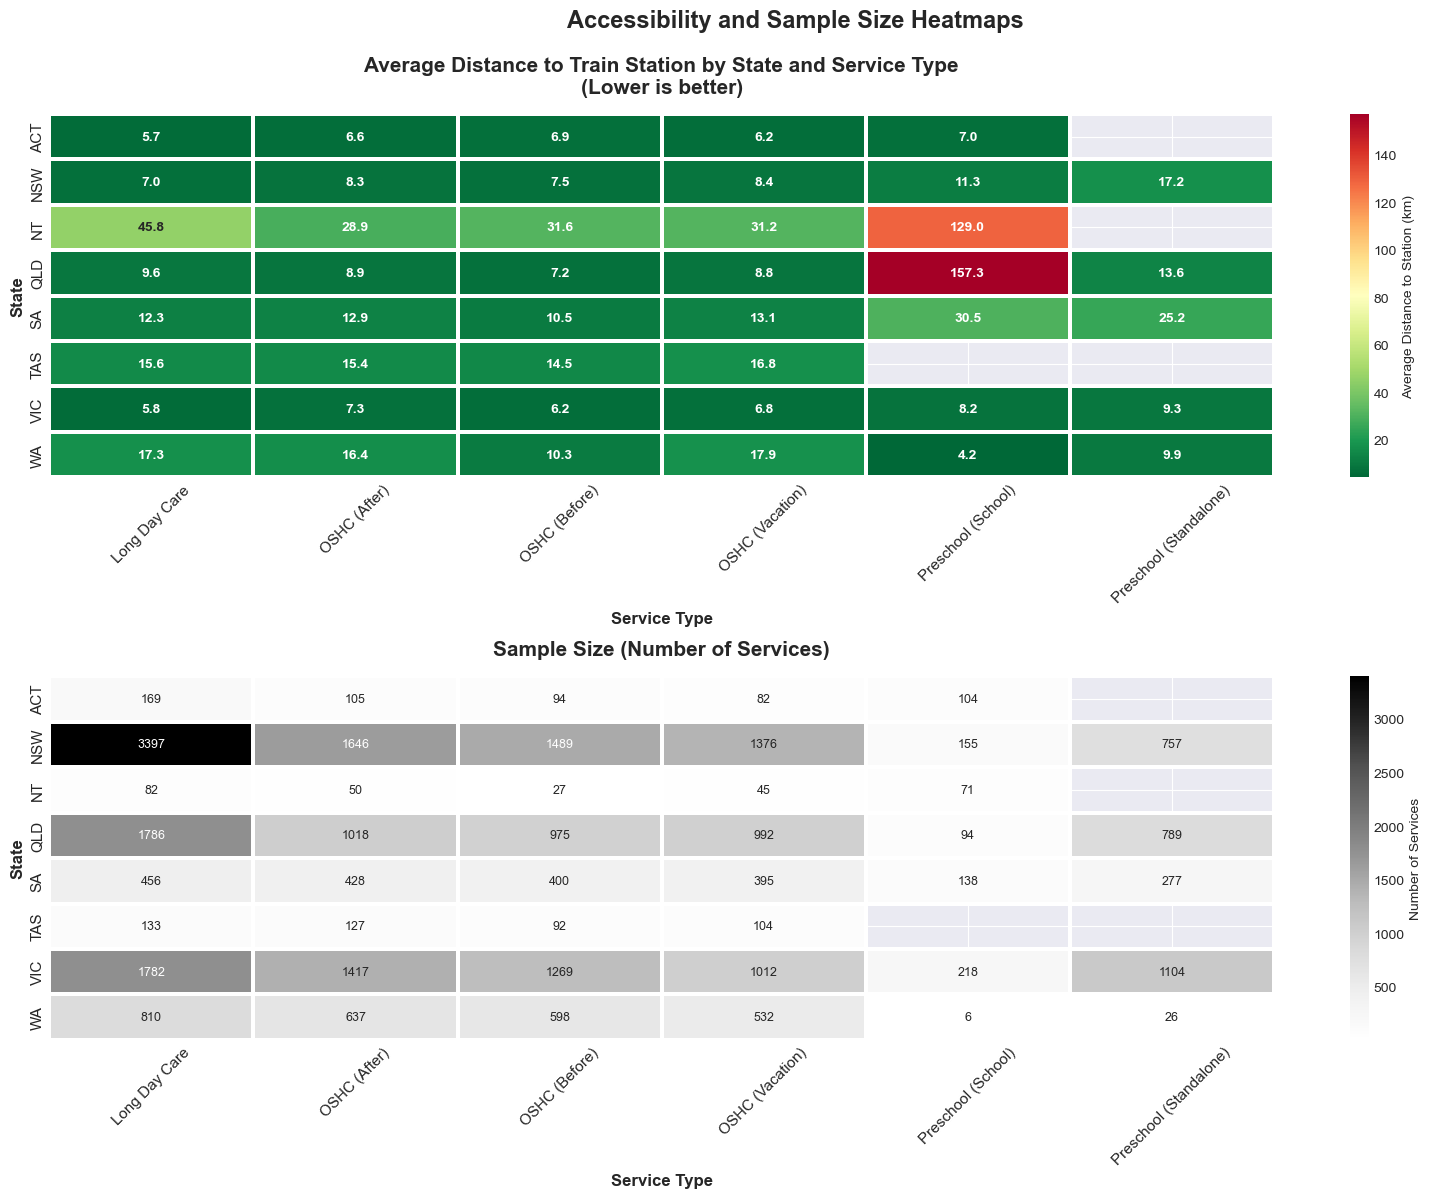


热力图统计摘要

各服务类型的总数:
  Long Day Care: 9,276 (31.6%)
  OSHC (After): 5,946 (20.2%)
  OSHC (Before): 5,362 (18.2%)
  OSHC (Vacation): 4,925 (16.8%)
  Preschool (Standalone): 3,034 (10.3%)
  Preschool (School): 844 (2.9%)

质量评分最高的州-服务组合 (Top 10):
  ACT - Preschool (School): 评分=3.69, 容量=56, n=104
  SA - Preschool (Standalone): 评分=3.60, 容量=45, n=277
  VIC - Preschool (School): 评分=3.53, 容量=70, n=218
  VIC - Preschool (Standalone): 评分=3.50, 容量=51, n=1104
  NSW - Preschool (School): 评分=3.46, 容量=42, n=155
  NSW - Preschool (Standalone): 评分=3.44, 容量=41, n=757
  SA - Preschool (School): 评分=3.28, 容量=42, n=138
  QLD - Preschool (Standalone): 评分=3.26, 容量=55, n=789
  VIC - Long Day Care: 评分=3.19, 容量=92, n=1782
  ACT - OSHC (Vacation): 评分=3.18, 容量=121, n=82

平均容量最大的州-服务组合 (Top 10):
  ACT - OSHC (Vacation): 容量=121, 评分=3.18, n=82
  ACT - OSHC (Before): 容量=109, 评分=3.14, n=94
  ACT - OSHC (After): 容量=108, 评分=3.12, n=105
  NT - OSHC (Before): 容量=100, 评分=2.93, n=27
  QLD - OSHC (Before): 容量=99, 评分=2.93, n=97

In [529]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 使用实际的服务类型列名
service_type_cols = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care'
]

print("使用的服务类型列:")
for col in service_type_cols:
    yes_count = (df[col].astype(str).str.lower().str.strip() == 'yes').sum()
    print(f"  {col}: {yes_count} 个 Yes")

# ============================================================================
# 创建长格式数据
# ============================================================================

long_format_data = []

for _, row in df.iterrows():
    for service_col in service_type_cols:
        if str(row.get(service_col, '')).strip().lower() == 'yes':
            # 简化服务类型名称以便显示
            if service_col == 'Long Day Care':
                service_name = 'Long Day Care'
            elif service_col == 'Preschool/Kindergarten - Part of a School':
                service_name = 'Preschool (School)'
            elif service_col == 'Preschool/Kindergarten - Stand alone':
                service_name = 'Preschool (Standalone)'
            elif service_col == 'Outside school Hours Care - After School':
                service_name = 'OSHC (After)'
            elif service_col == 'Outside school Hours Care - Before School':
                service_name = 'OSHC (Before)'
            elif service_col == 'Outside school Hours Care - Vacation Care':
                service_name = 'OSHC (Vacation)'
            else:
                service_name = service_col
            
            long_format_data.append({
                'State': row['State'],
                'ServiceType': service_name,
                'RatingScore': row['RatingScore'],
                'NumberOfApprovedPlaces': row['NumberOfApprovedPlaces'],
                'DistanceToTrainStation_km': row['DistanceToTrainStation_km'],
                'Urban_Rural': row.get('Urban_Rural', None)
            })

df_long = pd.DataFrame(long_format_data)

print(f"\n长格式数据: {len(df_long)} 行")
print("\n服务类型分布:")
print(df_long['ServiceType'].value_counts())

# ============================================================================
# 创建透视表
# ============================================================================

# 透视表1: 州 x 服务类型的平均质量评分
pivot_rating = df_long.pivot_table(
    values='RatingScore', 
    index='State', 
    columns='ServiceType', 
    aggfunc='mean'
)

# 透视表2: 州 x 服务类型的平均容量
pivot_capacity = df_long.pivot_table(
    values='NumberOfApprovedPlaces', 
    index='State', 
    columns='ServiceType', 
    aggfunc='mean'
)

# 透视表3: 州 x 服务类型的服务数量
pivot_count = df_long.pivot_table(
    values='RatingScore',
    index='State',
    columns='ServiceType',
    aggfunc='count'
)

# 透视表4: 州 x 服务类型的平均距离
pivot_distance = df_long.pivot_table(
    values='DistanceToTrainStation_km',
    index='State',
    columns='ServiceType',
    aggfunc='mean'
)

print("\n透视表形状:")
print(f"  评分: {pivot_rating.shape}")
print(f"  容量: {pivot_capacity.shape}")
print(f"  数量: {pivot_count.shape}")

# ============================================================================
# 绘制热力图 - 主图（质量和容量）
# ============================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# 热力图1: 质量评分
sns.heatmap(pivot_rating, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn',
            center=3.0,
            vmin=1, 
            vmax=5,
            cbar_kws={'label': 'Average Rating Score (1-5)'},
            linewidths=1.5,
            linecolor='white',
            ax=ax1,
            annot_kws={'size': 10, 'weight': 'bold'})

ax1.set_title('Average Quality Rating by State and Service Type', 
             fontsize=15, fontweight='bold', pad=15)
ax1.set_xlabel('Service Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('State', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=11)
ax1.tick_params(axis='y', labelsize=11)

# 热力图2: 平均容量
sns.heatmap(pivot_capacity, 
            annot=True, 
            fmt='.0f', 
            cmap='Blues',
            cbar_kws={'label': 'Average Approved Capacity'},
            linewidths=1.5,
            linecolor='white',
            ax=ax2,
            annot_kws={'size': 10, 'weight': 'bold'})

ax2.set_title('Average Approved Capacity by State and Service Type', 
             fontsize=15, fontweight='bold', pad=15)
ax2.set_xlabel('Service Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('State', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=11)
ax2.tick_params(axis='y', labelsize=11)

plt.suptitle('Service Characteristics: Quality and Capacity Heatmaps\nComparison Across States and Service Types',
            fontsize=17, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('heatmap_quality_capacity.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 额外图表：距离和样本量
# ============================================================================

fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(16, 12))

# 热力图3: 平均距离
sns.heatmap(pivot_distance, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn_r',  # 反向：距离越大越红
            cbar_kws={'label': 'Average Distance to Station (km)'},
            linewidths=1.5,
            linecolor='white',
            ax=ax3,
            annot_kws={'size': 10, 'weight': 'bold'})

ax3.set_title('Average Distance to Train Station by State and Service Type\n(Lower is better)', 
             fontsize=15, fontweight='bold', pad=15)
ax3.set_xlabel('Service Type', fontsize=12, fontweight='bold')
ax3.set_ylabel('State', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45, labelsize=11)
ax3.tick_params(axis='y', labelsize=11)

# 热力图4: 样本量
sns.heatmap(pivot_count, 
            annot=True, 
            fmt='.0f', 
            cmap='Greys',
            cbar_kws={'label': 'Number of Services'},
            linewidths=1.5,
            linecolor='white',
            ax=ax4,
            annot_kws={'size': 9})

ax4.set_title('Sample Size (Number of Services)', 
             fontsize=15, fontweight='bold', pad=15)
ax4.set_xlabel('Service Type', fontsize=12, fontweight='bold')
ax4.set_ylabel('State', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=45, labelsize=11)
ax4.tick_params(axis='y', labelsize=11)

plt.suptitle('Accessibility and Sample Size Heatmaps',
            fontsize=17, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('heatmap_distance_count.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 输出统计信息
# ============================================================================

print("\n" + "="*80)
print("热力图统计摘要")
print("="*80)

print("\n各服务类型的总数:")
service_counts = df_long['ServiceType'].value_counts()
for service, count in service_counts.items():
    pct = count / len(df_long) * 100
    print(f"  {service}: {count:,} ({pct:.1f}%)")

print("\n质量评分最高的州-服务组合 (Top 10):")
rating_flat = pivot_rating.stack().sort_values(ascending=False).head(10)
for (state, service), score in rating_flat.items():
    count = pivot_count.loc[state, service]
    capacity = pivot_capacity.loc[state, service]
    print(f"  {state} - {service}: 评分={score:.2f}, 容量={capacity:.0f}, n={int(count)}")

print("\n平均容量最大的州-服务组合 (Top 10):")
capacity_flat = pivot_capacity.stack().sort_values(ascending=False).head(10)
for (state, service), cap in capacity_flat.items():
    rating = pivot_rating.loc[state, service]
    count = pivot_count.loc[state, service]
    print(f"  {state} - {service}: 容量={cap:.0f}, 评分={rating:.2f}, n={int(count)}")

print("\n距离最近的州-服务组合 (Top 10):")
distance_flat = pivot_distance.stack().sort_values(ascending=True).head(10)
for (state, service), dist in distance_flat.items():
    rating = pivot_rating.loc[state, service]
    count = pivot_count.loc[state, service]
    print(f"  {state} - {service}: 距离={dist:.1f}km, 评分={rating:.2f}, n={int(count)}")

print("="*80)




长格式数据: 28,894 行

图1&2 透视表形状:
  容量: (6, 6)
  营业时间: (6, 6)

图3 透视表形状:
  评级矩阵: (5, 6)


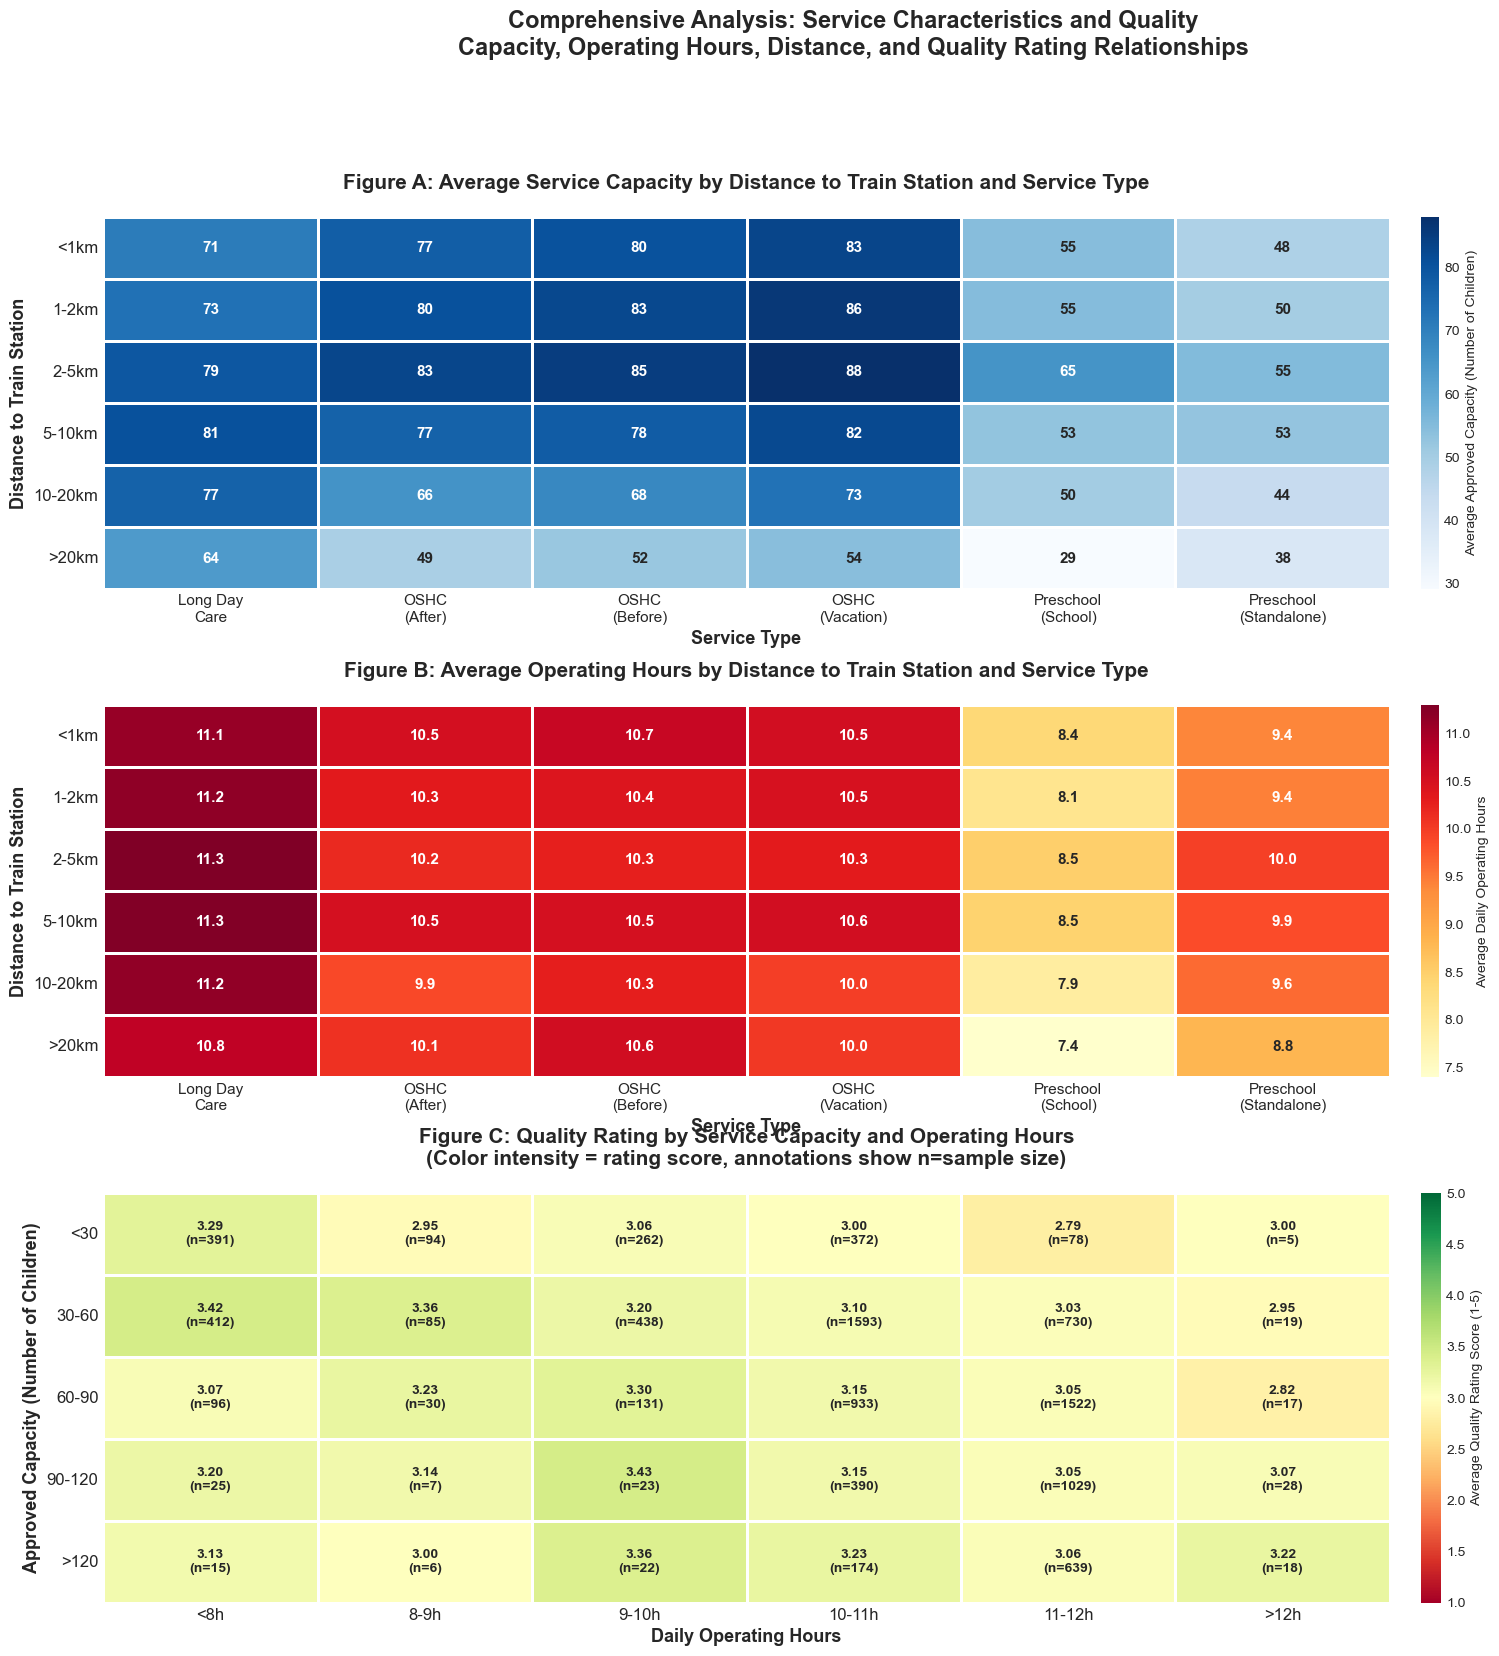


三图分析统计摘要

【图1&2】距离对容量和营业时间的影响:
--------------------------------------------------------------------------------
      <1km: 平均容量=  69.1, 平均营业时间= 10.1小时
     1-2km: 平均容量=  71.2, 平均营业时间= 10.0小时
     2-5km: 平均容量=  75.9, 平均营业时间= 10.1小时
    5-10km: 平均容量=  70.5, 平均营业时间= 10.2小时
   10-20km: 平均容量=  62.8, 平均营业时间=  9.8小时
     >20km: 平均容量=  47.7, 平均营业时间=  9.6小时

【图3】容量与营业时间对质量的影响:
--------------------------------------------------------------------------------

高质量组合 (评分 >= 4.0):

低质量组合 (评分 < 3.0):
  容量=<30, 营业时间=11-12h: 评分=2.79 (n=78)
  容量=60-90, 营业时间=>12h: 评分=2.82 (n=17)
  容量=<30, 营业时间=8-9h: 评分=2.95 (n=94)
  容量=30-60, 营业时间=>12h: 评分=2.95 (n=19)

关键洞察:
--------------------------------------------------------------------------------
1. 最高平均容量: 88 (在 OSHC (Vacation) 服务类型)
2. 最低平均容量: 29 (在 Preschool (School) 服务类型)
3. 最长营业时间: 11.3小时 (在 Long Day Care 服务类型)
4. 最短营业时间: 7.4小时 (在 Preschool (School) 服务类型)

5. 容量与质量的相关性: r=-0.010
6. 营业时间与质量的相关性: r=-0.107


In [531]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

# 创建距离分组
df['DistanceGroup'] = pd.cut(
    df['DistanceToTrainStation_km'],
    bins=[0, 1, 2, 5, 10, 20, 100],
    labels=['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
)

# 创建容量分组（用于图3）
df['CapacityGroup'] = pd.cut(
    df['NumberOfApprovedPlaces'],
    bins=[0, 30, 60, 90, 120, 500],
    labels=['<30', '30-60', '60-90', '90-120', '>120']
)

# 创建营业时间分组（用于图3）
df['HoursGroup'] = pd.cut(
    df['DailyAvgHours_open'],
    bins=[0, 8, 9, 10, 11, 12, 20],
    labels=['<8h', '8-9h', '9-10h', '10-11h', '11-12h', '>12h']
)

# 使用实际的服务类型列名
service_type_cols = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care'
]

# ============================================================================
# 创建长格式数据（用于图1和图2）
# ============================================================================

long_format_data = []

for _, row in df.iterrows():
    for service_col in service_type_cols:
        if str(row.get(service_col, '')).strip().lower() == 'yes':
            # 简化服务类型名称
            if service_col == 'Long Day Care':
                service_name = 'Long Day\nCare'
            elif service_col == 'Preschool/Kindergarten - Part of a School':
                service_name = 'Preschool\n(School)'
            elif service_col == 'Preschool/Kindergarten - Stand alone':
                service_name = 'Preschool\n(Standalone)'
            elif service_col == 'Outside school Hours Care - After School':
                service_name = 'OSHC\n(After)'
            elif service_col == 'Outside school Hours Care - Before School':
                service_name = 'OSHC\n(Before)'
            elif service_col == 'Outside school Hours Care - Vacation Care':
                service_name = 'OSHC\n(Vacation)'
            else:
                service_name = service_col
            
            long_format_data.append({
                'DistanceGroup': row['DistanceGroup'],
                'ServiceType': service_name,
                'RatingScore': row['RatingScore'],
                'NumberOfApprovedPlaces': row['NumberOfApprovedPlaces'],
                'DailyAvgHours_open': row.get('DailyAvgHours_open', None)
            })

df_long = pd.DataFrame(long_format_data)
df_long = df_long[df_long['DistanceGroup'].notna()]

print(f"长格式数据: {len(df_long):,} 行")

# ============================================================================
# 图1 & 图2: 透视表（距离 x 服务类型）
# ============================================================================

# 透视表1: 平均容量
pivot_capacity = df_long.pivot_table(
    values='NumberOfApprovedPlaces', 
    index='DistanceGroup', 
    columns='ServiceType', 
    aggfunc='mean'
)

# 透视表2: 平均营业时间
pivot_hours = df_long.pivot_table(
    values='DailyAvgHours_open',
    index='DistanceGroup',
    columns='ServiceType',
    aggfunc='mean'
)

print("\n图1&2 透视表形状:")
print(f"  容量: {pivot_capacity.shape}")
print(f"  营业时间: {pivot_hours.shape}")

# ============================================================================
# 图3: 透视表（容量 x 营业时间）
# ============================================================================

# 过滤有效数据
df_filtered = df[
    df['CapacityGroup'].notna() & 
    df['HoursGroup'].notna() & 
    df['RatingScore'].notna()
].copy()

pivot_rating_matrix = df_filtered.pivot_table(
    values='RatingScore',
    index='CapacityGroup',
    columns='HoursGroup',
    aggfunc='mean'
)

# 样本量（用于参考）
pivot_count_matrix = df_filtered.pivot_table(
    values='RatingScore',
    index='CapacityGroup',
    columns='HoursGroup',
    aggfunc='count'
)

print("\n图3 透视表形状:")
print(f"  评级矩阵: {pivot_rating_matrix.shape}")

# ============================================================================
# 绘制三张图
# ============================================================================

fig = plt.figure(figsize=(20, 18))
gs = fig.add_gridspec(3, 1, height_ratios=[1, 1, 1.1], hspace=0.3)

# ============================================================================
# 图1: 距离 x 服务类型 → 容量
# ============================================================================

ax1 = fig.add_subplot(gs[0])

distance_order = ['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']

pivot_capacity = pivot_capacity.reindex(distance_order)
pivot_hours = pivot_hours.reindex(distance_order)

sns.heatmap(pivot_capacity, 
            annot=True, 
            fmt='.0f', 
            cmap='Blues',
            cbar_kws={'label': 'Average Approved Capacity (Number of Children)', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax1,
            annot_kws={'size': 11, 'weight': 'bold'})

ax1.set_title('Figure A: Average Service Capacity by Distance to Train Station and Service Type', 
             fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Service Type', fontsize=13, fontweight='bold')
ax1.set_ylabel('Distance to Train Station', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=0, labelsize=11)
ax1.tick_params(axis='y', rotation=0, labelsize=12)

# ============================================================================
# 图2: 距离 x 服务类型 → 营业时间
# ============================================================================

ax2 = fig.add_subplot(gs[1])

sns.heatmap(pivot_hours, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Daily Operating Hours', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax2,
            annot_kws={'size': 11, 'weight': 'bold'})

ax2.set_title('Figure B: Average Operating Hours by Distance to Train Station and Service Type', 
             fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Service Type', fontsize=13, fontweight='bold')
ax2.set_ylabel('Distance to Train Station', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=0, labelsize=11)
ax2.tick_params(axis='y', rotation=0, labelsize=12)

# ============================================================================
# 图3: 容量 x 营业时间 → 质量评级
# ============================================================================

ax3 = fig.add_subplot(gs[2])

# 创建自定义注释：显示评分和样本量
annotations = []
for i in range(len(pivot_rating_matrix.index)):
    row_annots = []
    for j in range(len(pivot_rating_matrix.columns)):
        rating = pivot_rating_matrix.iloc[i, j]
        count = pivot_count_matrix.iloc[i, j]
        
        if pd.notna(rating) and pd.notna(count):
            annot_text = f'{rating:.2f}\n(n={int(count)})'
        else:
            annot_text = ''
        row_annots.append(annot_text)
    annotations.append(row_annots)

capacity_order = ['<30', '30-60', '60-90', '90-120', '>120']
hours_order = ['<8h', '8-9h', '9-10h', '10-11h', '11-12h', '>12h']

pivot_rating_matrix = pivot_rating_matrix.reindex(index=capacity_order, columns=hours_order)
pivot_count_matrix = pivot_count_matrix.reindex(index=capacity_order, columns=hours_order)

sns.heatmap(pivot_rating_matrix, 
            annot=annotations,
            fmt='',
            cmap='RdYlGn',
            center=3.0,
            vmin=1,
            vmax=5,
            cbar_kws={'label': 'Average Quality Rating Score (1-5)', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax3,
            annot_kws={'size': 10, 'weight': 'bold'})

ax3.set_title('Figure C: Quality Rating by Service Capacity and Operating Hours\n(Color intensity = rating score, annotations show n=sample size)', 
             fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Daily Operating Hours', fontsize=13, fontweight='bold')
ax3.set_ylabel('Approved Capacity (Number of Children)', fontsize=13, fontweight='bold')
ax3.tick_params(axis='x', rotation=0, labelsize=12)
ax3.tick_params(axis='y', rotation=0, labelsize=12)

# 总标题
fig.suptitle('Comprehensive Analysis: Service Characteristics and Quality\nCapacity, Operating Hours, Distance, and Quality Rating Relationships',
            fontsize=17, fontweight='bold', y=0.995)

plt.savefig('three_panel_heatmap_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================================================
# 输出统计信息
# ============================================================================

print("\n" + "="*80)
print("三图分析统计摘要")
print("="*80)

print("\n【图1&2】距离对容量和营业时间的影响:")
print("-" * 80)
for distance in pivot_capacity.index:
    avg_capacity = pivot_capacity.loc[distance].mean()
    avg_hours = pivot_hours.loc[distance].mean()
    print(f"{distance:>10s}: 平均容量={avg_capacity:6.1f}, 平均营业时间={avg_hours:5.1f}小时")

print("\n【图3】容量与营业时间对质量的影响:")
print("-" * 80)
print("\n高质量组合 (评分 >= 4.0):")
high_quality = []
for i in range(len(pivot_rating_matrix.index)):
    for j in range(len(pivot_rating_matrix.columns)):
        rating = pivot_rating_matrix.iloc[i, j]
        count = pivot_count_matrix.iloc[i, j]
        if pd.notna(rating) and rating >= 4.0 and count >= 10:
            capacity = pivot_rating_matrix.index[i]
            hours = pivot_rating_matrix.columns[j]
            high_quality.append((capacity, hours, rating, int(count)))

high_quality.sort(key=lambda x: x[2], reverse=True)
for capacity, hours, rating, count in high_quality[:10]:
    print(f"  容量={capacity}, 营业时间={hours}: 评分={rating:.2f} (n={count})")

print("\n低质量组合 (评分 < 3.0):")
low_quality = []
for i in range(len(pivot_rating_matrix.index)):
    for j in range(len(pivot_rating_matrix.columns)):
        rating = pivot_rating_matrix.iloc[i, j]
        count = pivot_count_matrix.iloc[i, j]
        if pd.notna(rating) and rating < 3.0 and count >= 10:
            capacity = pivot_rating_matrix.index[i]
            hours = pivot_rating_matrix.columns[j]
            low_quality.append((capacity, hours, rating, int(count)))

low_quality.sort(key=lambda x: x[2])
for capacity, hours, rating, count in low_quality[:5]:
    print(f"  容量={capacity}, 营业时间={hours}: 评分={rating:.2f} (n={count})")

print("\n关键洞察:")
print("-" * 80)
print(f"1. 最高平均容量: {pivot_capacity.max().max():.0f} (在 {pivot_capacity.max().idxmax().replace(chr(10), ' ')} 服务类型)")
print(f"2. 最低平均容量: {pivot_capacity.min().min():.0f} (在 {pivot_capacity.min().idxmin().replace(chr(10), ' ')} 服务类型)")
print(f"3. 最长营业时间: {pivot_hours.max().max():.1f}小时 (在 {pivot_hours.max().idxmax().replace(chr(10), ' ')} 服务类型)")
print(f"4. 最短营业时间: {pivot_hours.min().min():.1f}小时 (在 {pivot_hours.min().idxmin().replace(chr(10), ' ')} 服务类型)")

# 图3的整体趋势
overall_capacity_corr = df_filtered[['NumberOfApprovedPlaces', 'RatingScore']].corr().iloc[0, 1]
overall_hours_corr = df_filtered[['DailyAvgHours_open', 'RatingScore']].corr().iloc[0, 1]
print(f"\n5. 容量与质量的相关性: r={overall_capacity_corr:.3f}")
print(f"6. 营业时间与质量的相关性: r={overall_hours_corr:.3f}")

print("="*80)